<a href="https://colab.research.google.com/github/chaandini2001/intro-ml-course-winter2025/blob/main/Phase_3_Final%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Data**

Data Source: TMU DM+Complic+Med Category 808K Jan 2025 R1.csv

In [ ]:
pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import files
import io
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve, RocCurveDisplay,precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
import scipy.stats as stats
from sklearn import tree
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm

from google.colab import drive
drive.mount('/content/drive')


#warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/Data/TMU DM+Complic+Med Category 808K Jan 2025 R1.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-12-613b37f9043d>:33: DtypeWarning: Columns (28,29,31,33,35,37,39,41,43,47,49,51,55,57,59,61,63,65,67,69,71,77,79,81,83,85,87,91,93,95,97,101,103,105,107,109,136,137,139,140,145,148,153,156,161,163,164,168,169,171,172) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Data/TMU DM+Complic+Med Category 808K Jan 2025 R1.csv')


In [ ]:
#Ensuring data was imported and displayed correctly
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.sample(5)

Age_at_Exam     Sex    sBP    sBP_Date    BMI    BMI_Date   LDL  \
543435           69  Female  120.0  2010-07-12  26.42  2010-07-12  4.98   
65427            75  Female  174.0  2012-03-22  18.20  2012-02-24  3.50   
732211           52    Male  122.0  2010-02-10  36.50  2010-02-10  2.08   
446360           62  Female  116.0  2012-11-01  23.80  2012-11-01  3.88   
71019            88  Female  146.0  2009-04-15  34.20  2009-04-15  3.00   

          LDL_Date   HDL    HDL_Date  A1c    A1c_Date    TG     TG_Date  FBS  \
543435  2010-07-20  1.84  2010-07-20  5.4  2010-07-20  1.53  2010-07-20  4.1   
65427   2012-03-02  1.50  2012-03-02  NaN         NaN  1.39  2012-03-02  5.8   
732211  2009-03-31  0.87  2009-03-31  NaN         NaN  3.29  2009-03-31  6.7   
446360  2012-11-06  1.92  2012-11-06  5.6  2012-11-06  1.30  2012-11-06  4.5   
71019   2009-04-21  1.40  2009-04-21  NaN         NaN  1.90  2009-04-21  6.2   

          FBS_Date  Total_Cholesterol Total_Cholesterol_Lab_Date  Diabetes  \
543435  2010-07-20               7.52                 2010-07-20         0   
65427   2012-03-02               5.60                 2012-03-02         0   
732211  2010-02-10               4.46                 2009-03-31         1   
446360  2012-11-06               6.39                 2012-11-06         0   
71019   2009-04-23               5.30                 2009-04-21         0   

        Depression Depression_OnsetDate  HTN HTN_OnsetDate  OA OA_OnsetDate  \
543435           0                  NaN    0           NaN   0          NaN   
65427            0                  NaN    1    2009-04-15   1   2012-08-27   
732211           0                  NaN    1    2009-03-31   0          NaN   
446360           0                  NaN    0           NaN   0          NaN   
71019            0                  NaN    1    2009-04-15   0          NaN   

        COPD COPD_Date        Patient_ID DM_OnsetDate  \
543435     0       NaN  4001000000034376          NaN   
65427      0       NaN  8001000805027962          NaN   
732211     0       NaN  1002000000005359   2009-03-24   
446360     0       NaN  2001000000028100          NaN   
71019      0       NaN  8001000805029756          NaN   

       DM_Onset_Revised_1YrPrior  [Amputation) [Amputation_Date]  [Anxiety)  \
543435                       NaN           NaN               NaN        NaN   
65427                        NaN           NaN               NaN        NaN   
732211                2008-03-24           NaN               NaN        NaN   
446360                       NaN           0.0               NaN        1.0   
71019                        NaN           0.0               NaN        1.0   

       [Anxiety_Date]  [Arrhythmia) [Arrhythmia_Date]  [AtrialFibrillation)  \
543435            NaN           NaN               NaN                   NaN   
65427             NaN           NaN               NaN                   NaN   
732211            NaN           NaN               NaN                   NaN   
446360     2005-09-09           0.0               NaN                   0.0   
71019      2009-04-15           0.0               NaN                   0.0   

       [AtrialFibrillation_Date]  [Blindness) [Blindness_Date]  [CABG)  \
543435                       NaN          NaN              NaN     NaN   
65427                        NaN          NaN              NaN     NaN   
732211                       NaN          NaN              NaN     NaN   
446360                       NaN          0.0              NaN     0.0   
71019                        NaN          0.0              NaN     0.0   

       [CABG_Date]  [CAD) [CAD_Date]  [Cancer) [Cancer_Date]  \
543435         NaN    NaN        NaN       NaN           NaN   
65427          NaN    NaN        NaN       NaN           NaN   
732211         NaN    NaN        NaN       NaN           NaN   
446360         NaN    0.0        NaN       1.0    2005-09-09   
71019          NaN    0.0        NaN       1.0    2014-02-26   

        [

#**Data Preparation**

Separating data to only include patients diabetes or patient without diabetes

In [ ]:
df['Diabetes'].value_counts()

Diabetes
0    574457
1    234464
Name: count, dtype: int64

In [ ]:
patients_with_diabetes = df.loc[df["Diabetes"] == 1, "Patient_ID"].dropna().unique()
df_diabetes = df[df["Patient_ID"].isin(list(patients_with_diabetes))]
df_diabetes.shape

(234464, 175)

In [ ]:
patients_without_diabetes = df.loc[df["Diabetes"] == 0, "Patient_ID"].dropna().unique()
df_no_diabetes = df[df["Patient_ID"].isin(list(patients_without_diabetes))]
df_no_diabetes.shape

(574457, 175)

Assessing duplication on patient ID

In [ ]:
num_duplicates = df['Patient_ID'].duplicated().sum()
print(f"Number of duplicate Patient_IDs: {num_duplicates}")

Number of duplicate Patient_IDs: 637302


Creating target variable (patients with anxiety/depression/both) in all 3 datasets, and filtering for last patient record

In [ ]:
df_diabetes = df_diabetes.copy()  # This removes the warning
df_diabetes["Has_Any_Psych_Condition"] = (
    (df_diabetes["[Anxiety)"] == 1) |
    (df_diabetes["Depression"] == 1)
).astype(int)

df_DB_last_record = df_diabetes.sort_values(by="sBP_Date", ascending=False).drop_duplicates(subset="Patient_ID", keep="first")

df_DB_last_record.shape

(25920, 176)

In [ ]:
df_DB_last_record['sBP_Date'] = pd.to_datetime(df_DB_last_record['sBP_Date'])

# Get the first and last dates
first_date = df_DB_last_record['sBP_Date'].min()
last_date = df_DB_last_record['sBP_Date'].max()

print("First date:", first_date)
print("Last date:", last_date)

First date: 2004-01-12 00:00:00
Last date: 2015-06-30 00:00:00


In [ ]:
df_no_diabetes = df_no_diabetes.copy()  # This removes the warning
df_no_diabetes["Has_Any_Psych_Condition"] = (
    (df_no_diabetes["[Anxiety)"] == 1) |
    (df_no_diabetes["Depression"] == 1)
).astype(int)

df_ND_last_record = df_no_diabetes.sort_values(by="sBP_Date", ascending=False).drop_duplicates(subset="Patient_ID", keep="first")

df_ND_last_record.shape

(145699, 176)

In [ ]:
df_all = df.copy()  # This removes the warning
df_all["Has_Any_Psych_Condition"] = (
    (df_all["[Anxiety)"] == 1) |
    (df_all["Depression"] == 1)
).astype(int)

df_all_last_record = df_all.sort_values(by="sBP_Date", ascending=False).drop_duplicates(subset="Patient_ID", keep="first")

df_all_last_record.shape

(171619, 176)

## Creating data with only feature and target variables


In [ ]:
selectedD = df_DB_last_record[[
"Age_at_Exam",
"Sex",
"sBP",
#"BMI", removed due to co-linearity
"LDL",
#"HDL", removed due to co-linearity
#"A1c", removed due to co-linearity
"TG",
"FBS",
"b_R1_skin",
"b_R1_foot",
"b_R1_heart",
"b_R1_eye",
"b_R1_cancer",
"b_R1_kidney",
"b_R1_brain",
"b_R1_death",
"b_R1_gastric",
"b_R1_pancreas",
"b_R1_sleep",
"Has_Any_Psych_Condition"
]]

selectedD = pd.get_dummies(selectedD, columns=['Sex'], drop_first=True)



In [ ]:
selectedND = df_ND_last_record[[
"Age_at_Exam",
"Sex",
"sBP",
#"BMI", removed due to co-linearity
"LDL",
#"HDL", removed due to co-linearity
#"A1c", removed due to co-linearity
"TG",
"FBS",
"b_R1_skin",
"b_R1_foot",
"b_R1_heart",
"b_R1_eye",
"b_R1_cancer",
"b_R1_kidney",
"b_R1_brain",
"b_R1_death",
"b_R1_gastric",
"b_R1_pancreas",
"b_R1_sleep",
"Has_Any_Psych_Condition"
]]

selectedND = pd.get_dummies(selectedND, columns=['Sex'], drop_first=True)

In [ ]:
selectedALL = df_all_last_record[[
"Age_at_Exam",
"Sex",
"sBP",
#"BMI", removed due to co-linearity
"LDL",
#"HDL", removed due to co-linearity
#"A1c", removed due to co-linearity
"TG",
"FBS",
"b_R1_skin",
"b_R1_foot",
"b_R1_heart",
"b_R1_eye",
"b_R1_cancer",
"b_R1_kidney",
"b_R1_brain",
"b_R1_death",
"b_R1_gastric",
"b_R1_pancreas",
"b_R1_sleep",
"Has_Any_Psych_Condition"
]]

selectedALL = pd.get_dummies(selectedALL, columns=['Sex'], drop_first=True)

## Dealing with missingness

**Dataset 1:** Diabetes

In [ ]:
# Calculate missingness in each variable
missing_counts = selectedD.isna().sum()  # Count of missing values per column
total_counts = selectedD.shape[0]  # Total number of rows (same for all columns)
missing_percentage = (missing_counts / total_counts) * 100  # Convert to percentage

# Combine into a summary DataFrame
missing_summary = pd.DataFrame({
    #"Missing Values": missing_counts,
    #"Total Values": total_counts,
    "Missing Percentage": missing_percentage
})

# Display summary
print(missing_summary)

                         Missing Percentage
Age_at_Exam                        0.000000
sBP                                0.123457
LDL                                1.107253
TG                                 1.076389
FBS                                0.000000
b_R1_skin                          0.000000
b_R1_foot                          0.000000
b_R1_heart                         0.000000
b_R1_eye                           0.000000
b_R1_cancer                        0.000000
b_R1_kidney                        0.000000
b_R1_brain                         0.000000
b_R1_death                         0.000000
b_R1_gastric                       0.000000
b_R1_pancreas                      0.000000
b_R1_sleep                         0.000000
Has_Any_Psych_Condition            0.000000
Sex_Male                           0.000000


In [ ]:
# Imputting missing values
selectedD = selectedD.assign(
    sBP=selectedD["sBP"].fillna(selectedD["sBP"].mean()),
    LDL=selectedD["LDL"].fillna(selectedD["LDL"].mean()),
    TG=selectedD["TG"].fillna(selectedD["TG"].median())
)

**Dataset 2:** No Diabetes

In [ ]:
# Calculate missingness in each variable
missing_counts = selectedND.isna().sum()  # Count of missing values per column
total_counts = selectedND.shape[0]  # Total number of rows (same for all columns)
missing_percentage = (missing_counts / total_counts) * 100  # Convert to percentage

# Combine into a summary DataFrame
missing_summary = pd.DataFrame({
    #"Missing Values": missing_counts,
    #"Total Values": total_counts,
    "Missing Percentage": missing_percentage
})

# Display summary
print(missing_summary)

                         Missing Percentage
Age_at_Exam                        0.000000
sBP                                0.066576
LDL                                0.502406
TG                                 1.659586
FBS                                0.000000
b_R1_skin                          0.000000
b_R1_foot                          0.000000
b_R1_heart                         0.000000
b_R1_eye                           0.000000
b_R1_cancer                        0.000000
b_R1_kidney                        0.000000
b_R1_brain                         0.000000
b_R1_death                         0.000000
b_R1_gastric                       0.000000
b_R1_pancreas                      0.000000
b_R1_sleep                         0.000000
Has_Any_Psych_Condition            0.000000
Sex_Male                           0.000000


In [ ]:
# Imputting missing values
selectedND = selectedND.assign(
    sBP=selectedND["sBP"].fillna(selectedND["sBP"].mean()),
    LDL=selectedND["LDL"].fillna(selectedND["LDL"].mean()),
    TG=selectedND["TG"].fillna(selectedND["TG"].median())
)

**Dataset 3:** All patients

In [ ]:
# Calculate missingness in each variable
missing_counts = selectedALL.isna().sum()  # Count of missing values per column
total_counts = selectedALL.shape[0]  # Total number of rows (same for all columns)
missing_percentage = (missing_counts / total_counts) * 100  # Convert to percentage

# Combine into a summary DataFrame
missing_summary = pd.DataFrame({
    #"Missing Values": missing_counts,
    #"Total Values": total_counts,
    "Missing Percentage": missing_percentage
})

# Display summary
print(missing_summary)

                         Missing Percentage
Age_at_Exam                        0.000000
sBP                                0.072836
LDL                                0.593757
TG                                 1.571504
FBS                                0.000000
b_R1_skin                          0.000000
b_R1_foot                          0.000000
b_R1_heart                         0.000000
b_R1_eye                           0.000000
b_R1_cancer                        0.000000
b_R1_kidney                        0.000000
b_R1_brain                         0.000000
b_R1_death                         0.000000
b_R1_gastric                       0.000000
b_R1_pancreas                      0.000000
b_R1_sleep                         0.000000
Has_Any_Psych_Condition            0.000000
Sex_Male                           0.000000


In [ ]:
# Imputting missing values
selectedALL = selectedALL.assign(
    sBP=selectedALL["sBP"].fillna(selectedALL["sBP"].mean()),
    LDL=selectedALL["LDL"].fillna(selectedALL["LDL"].mean()),
    TG=selectedALL["TG"].fillna(selectedALL["TG"].median())
)

#**Descriptive Statistics**


In [ ]:
# Function to compute statistics
def generate_summary(df):
    summary = df.describe().T  # Transpose for better readability
    summary = summary[['mean', '50%', 'std', 'max', 'min']]  # Select required metrics
    summary.rename(columns={'50%': 'median'}, inplace=True)  # Rename median column
    return summary

# Generate summaries
summary_ND = generate_summary(selectedND)
summary_D = generate_summary(selectedD)
summary_ALL = generate_summary(selectedALL)

# Display summaries
print("Summary for selectedND:\n", summary_ND)
print("\nSummary for selectedD:\n", summary_D)
print("\nSummary for selectedALL:\n", summary_ALL)

Summary for selectedND:
                                mean  median        std     max   min
Age_at_Exam               54.746910   54.00  14.851555   90.00  18.0
sBP                      124.554154  124.00  15.692864  241.00  40.0
LDL                        2.952294    2.90   0.879069   10.00   0.1
TG                         1.317567    1.13   0.790284   47.99   0.1
FBS                        5.141448    5.10   0.558915   14.30   2.1
b_R1_skin                  0.032265    0.00   0.176704    1.00   0.0
b_R1_foot                  0.006445    0.00   0.080021    1.00   0.0
b_R1_heart                 0.040632    0.00   0.197436    1.00   0.0
b_R1_eye                   0.014098    0.00   0.117894    1.00   0.0
b_R1_cancer                0.035306    0.00   0.184552    1.00   0.0
b_R1_kidney                0.011888    0.00   0.108380    1.00   0.0
b_R1_brain                 0.008655    0.00   0.092628    1.00   0.0
b_R1_death                 0.000103    0.00   0.010146    1.00   0.0
b_R1_gast

In [ ]:
# Function to calculate class distribution
def class_distribution(df, df_name):
    return df["Has_Any_Psych_Condition"].value_counts().rename_axis("Class").reset_index(name=df_name)

# Get class distribution for each dataframe
dist_all = class_distribution(selectedALL, "ALL")
dist_nd = class_distribution(selectedND, "ND")
dist_d = class_distribution(selectedD, "D")

# Merge distributions into a single table
class_dist_table = dist_all.merge(dist_nd, on="Class", how="outer").merge(dist_d, on="Class", how="outer")

# Fill NaN values with 0 (if any)
class_dist_table = class_dist_table.fillna(0)

# Display the table
print(class_dist_table)


   Class     ALL      ND      D
0      0  135713  115380  20333
1      1   35906   30319   5587


**Dataset 1:** Diabetics

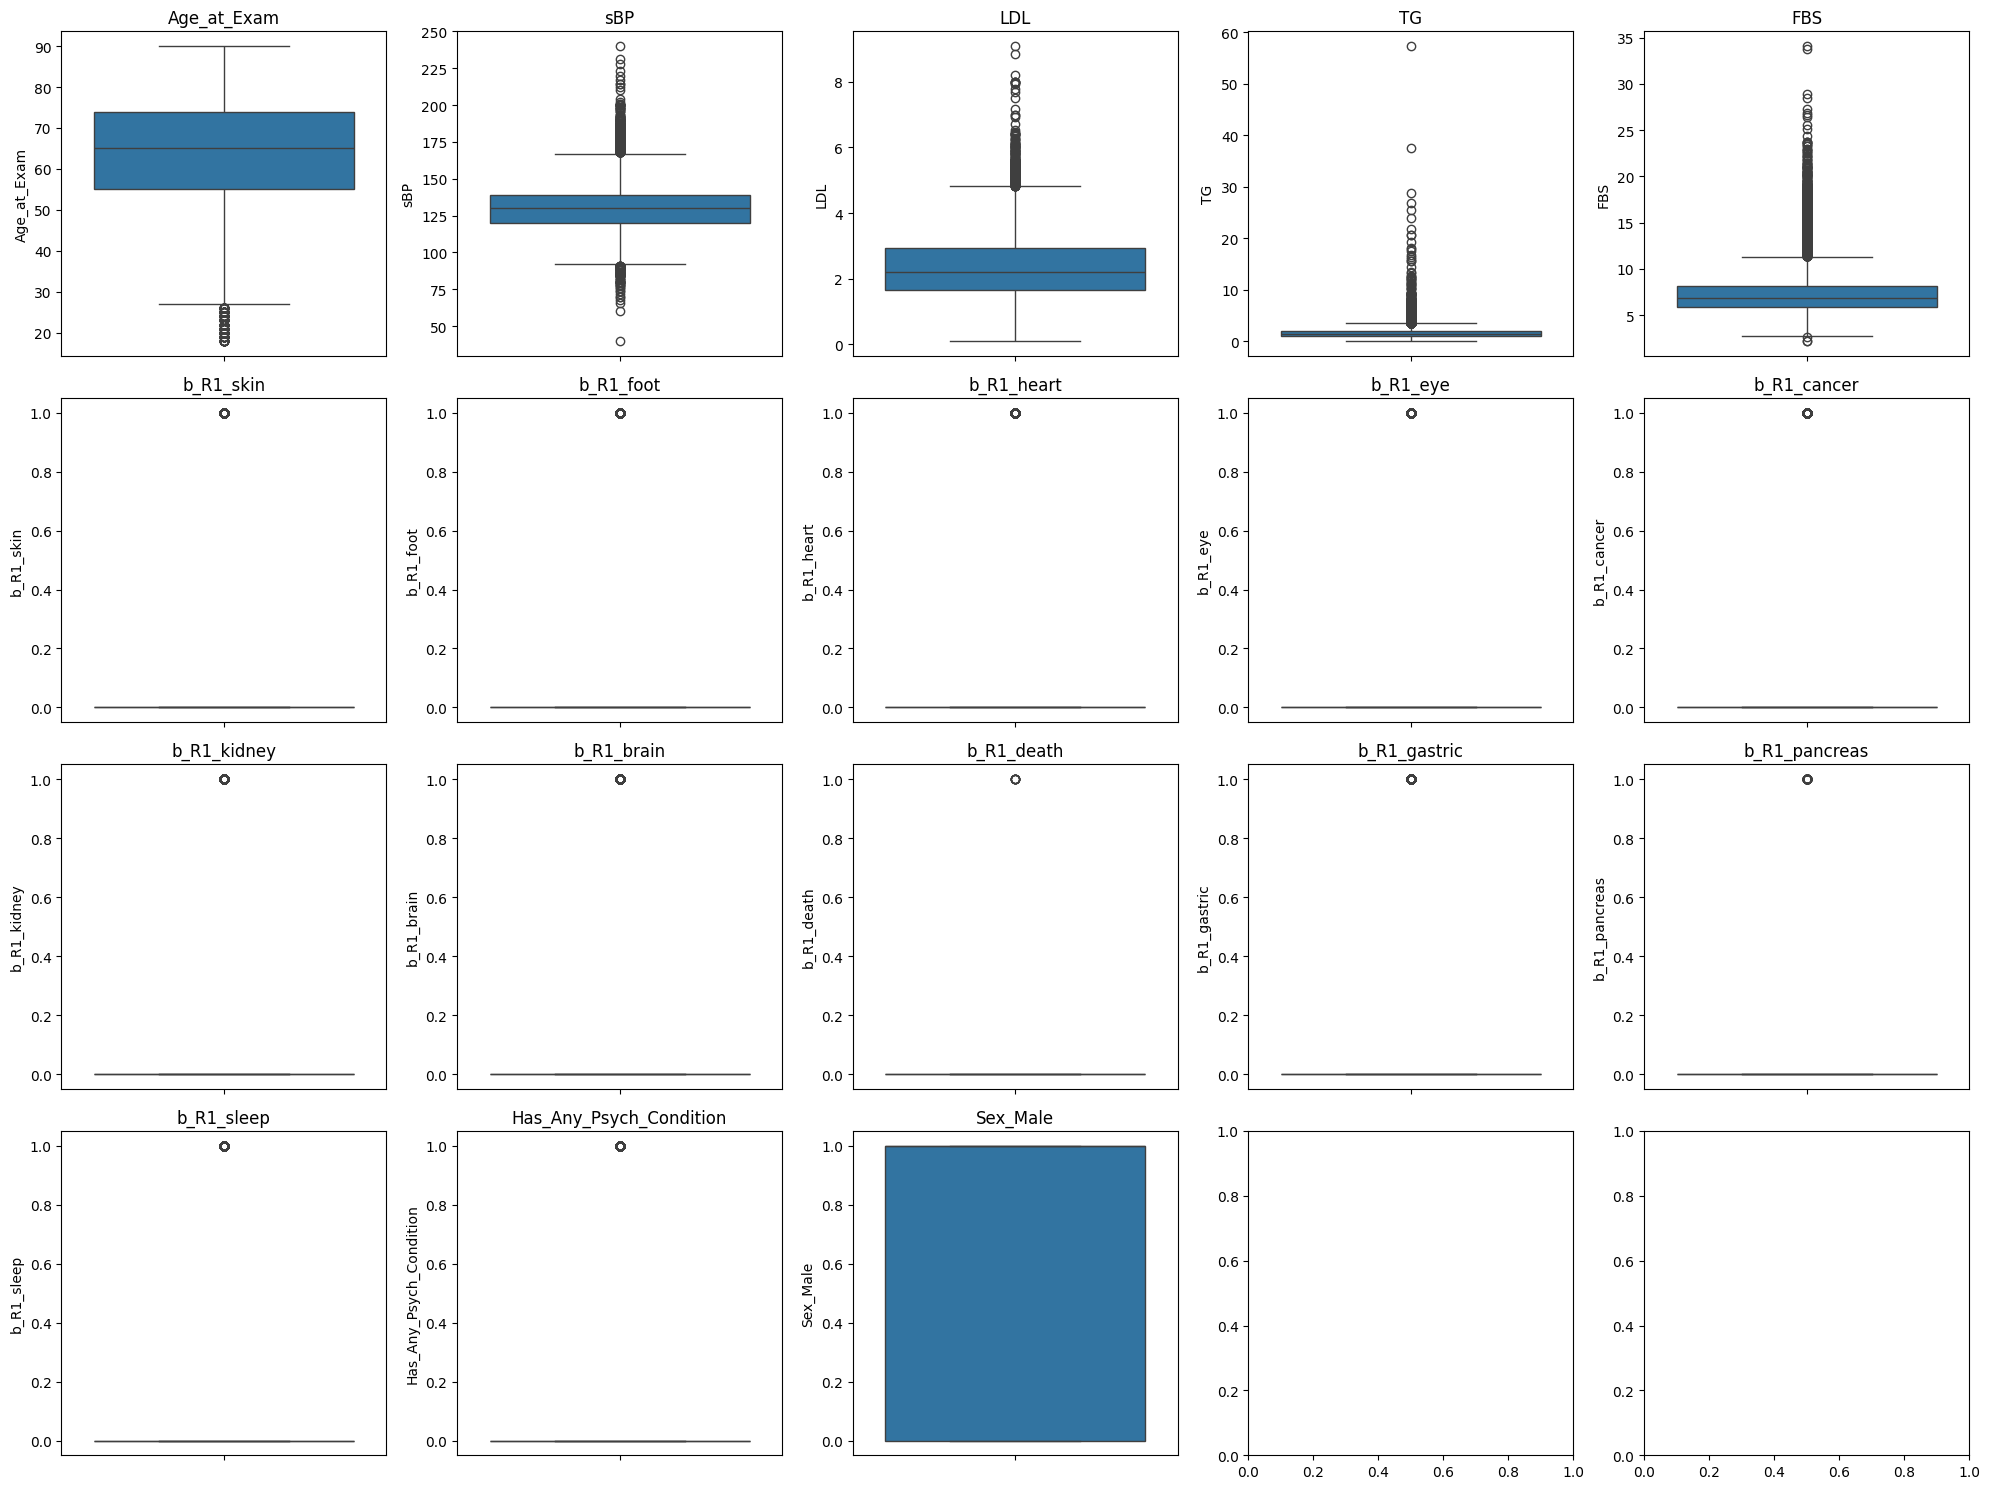

In [ ]:
# Box-Plot
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(selectedD.columns):
    sns.boxplot(y=selectedD[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

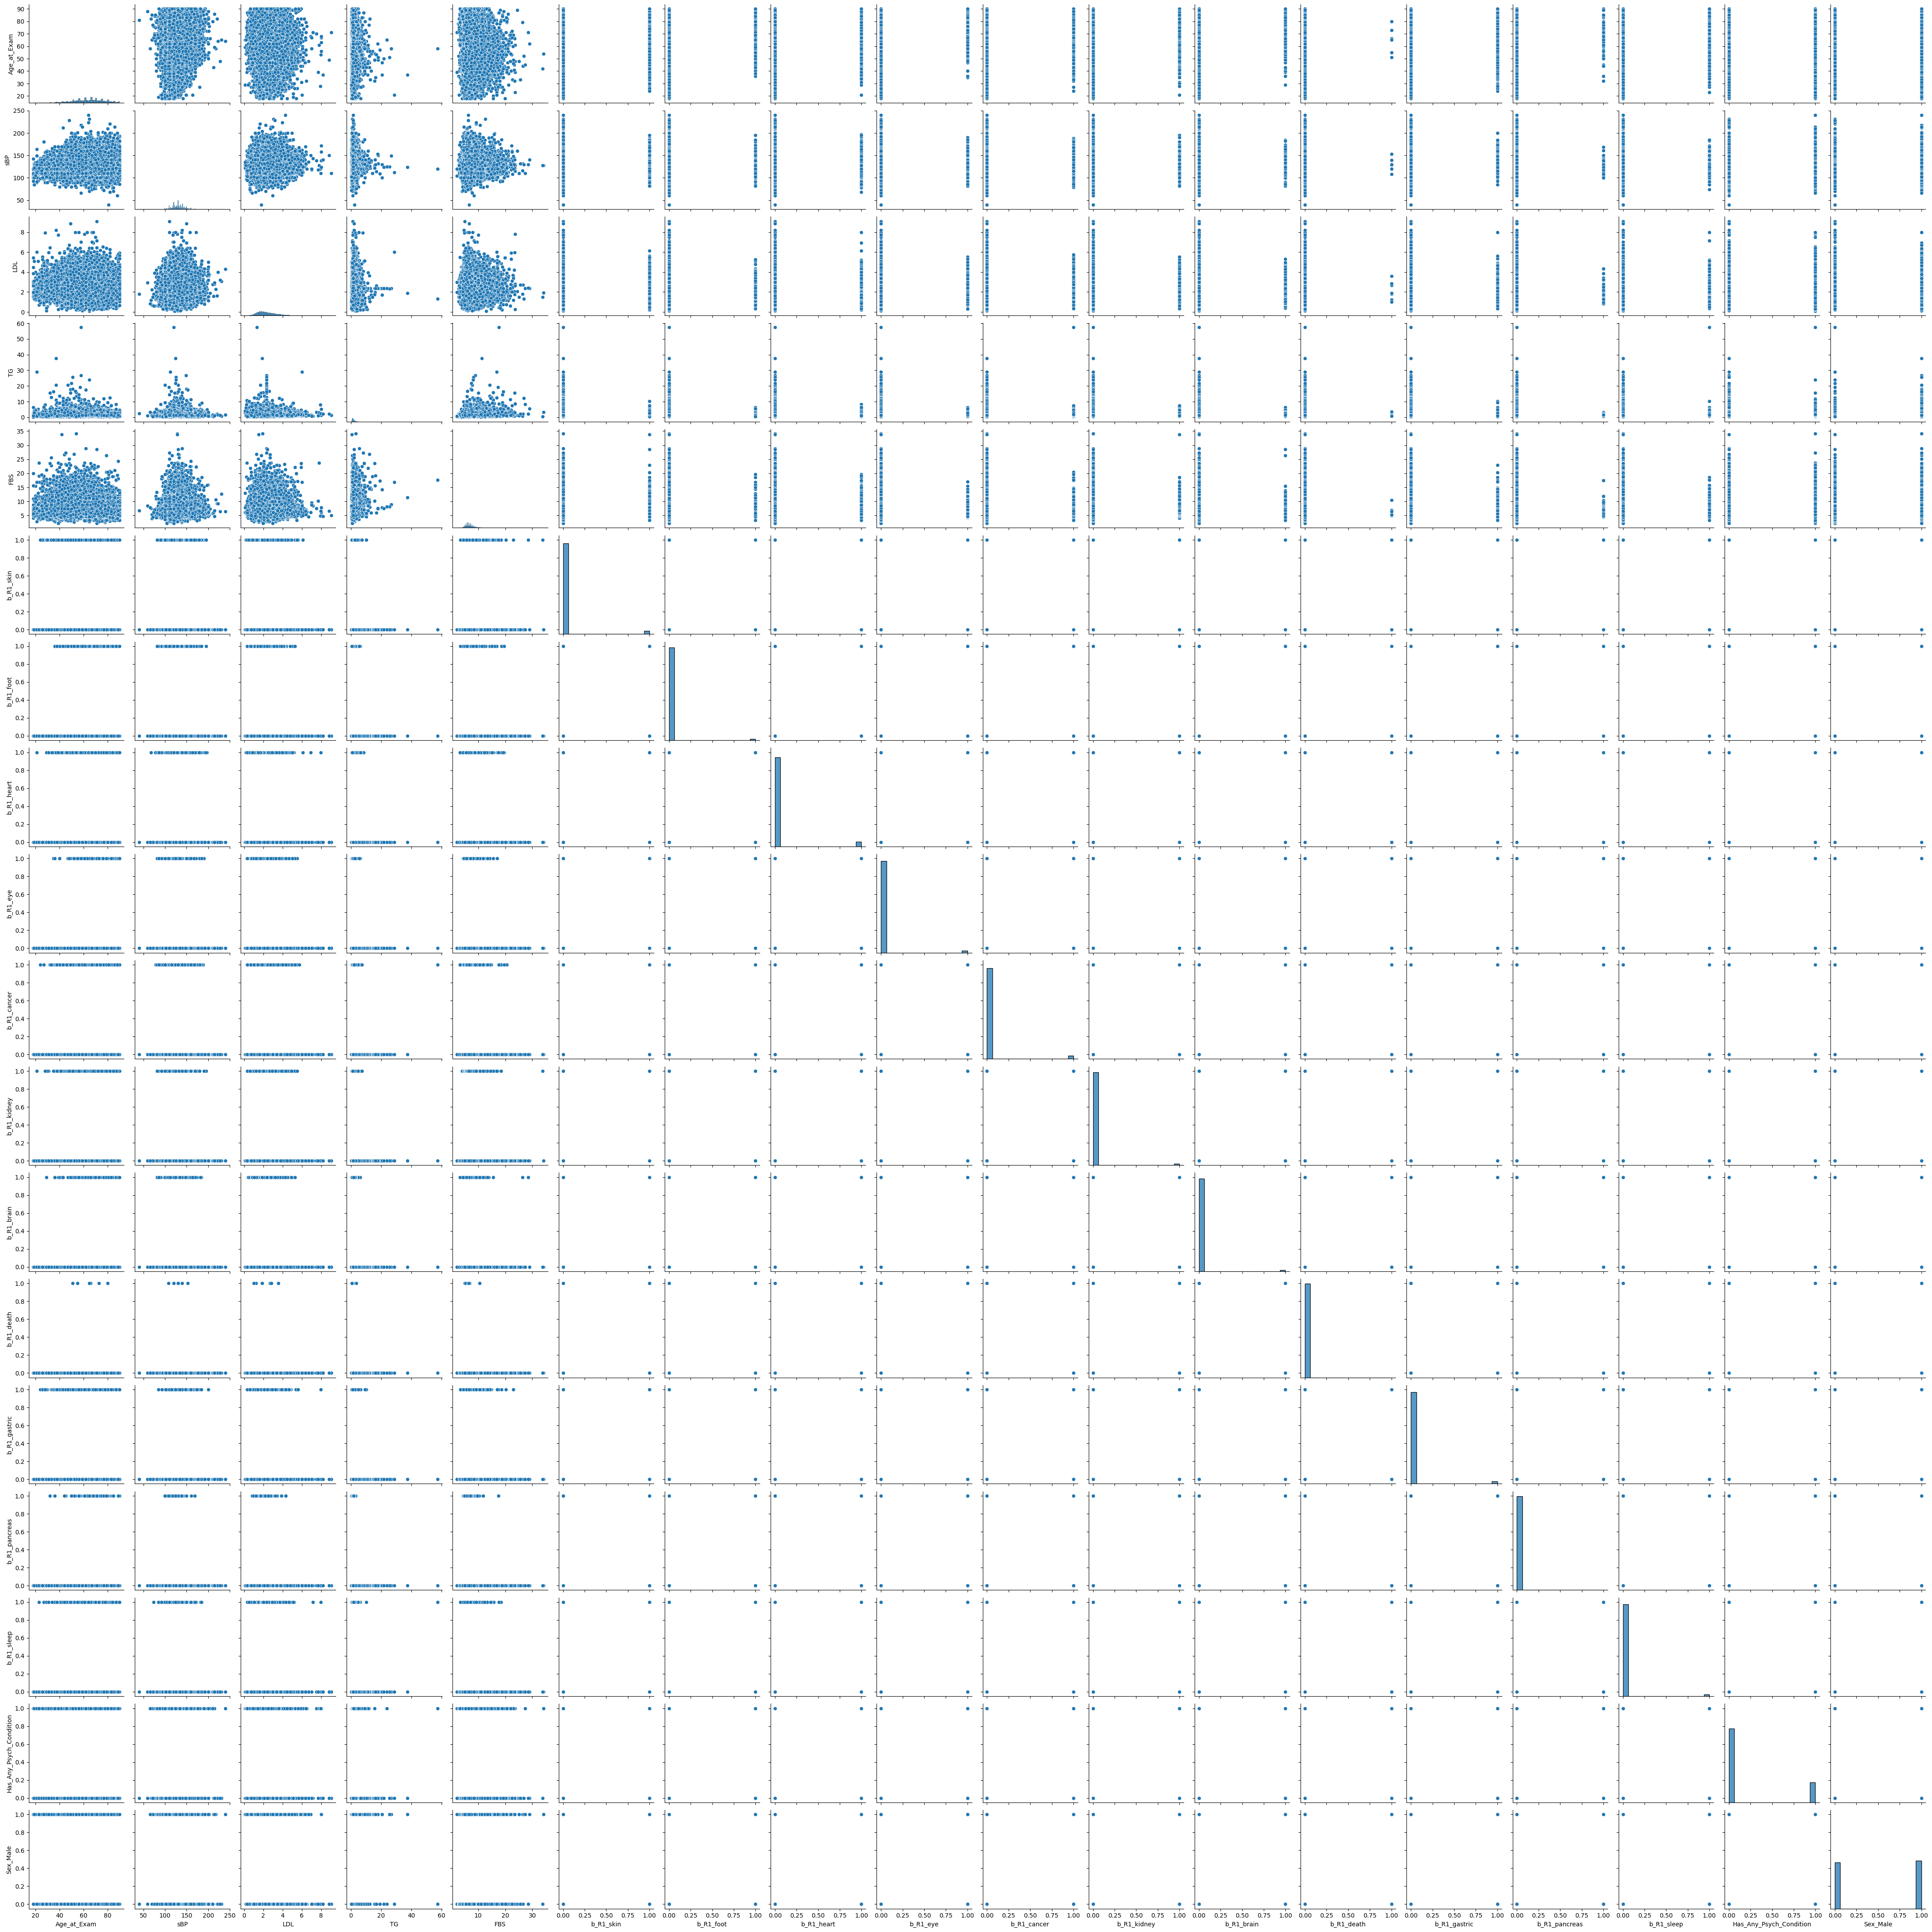

In [ ]:
# Scatter Plot Matrix
sns.pairplot(selectedD)
plt.show()

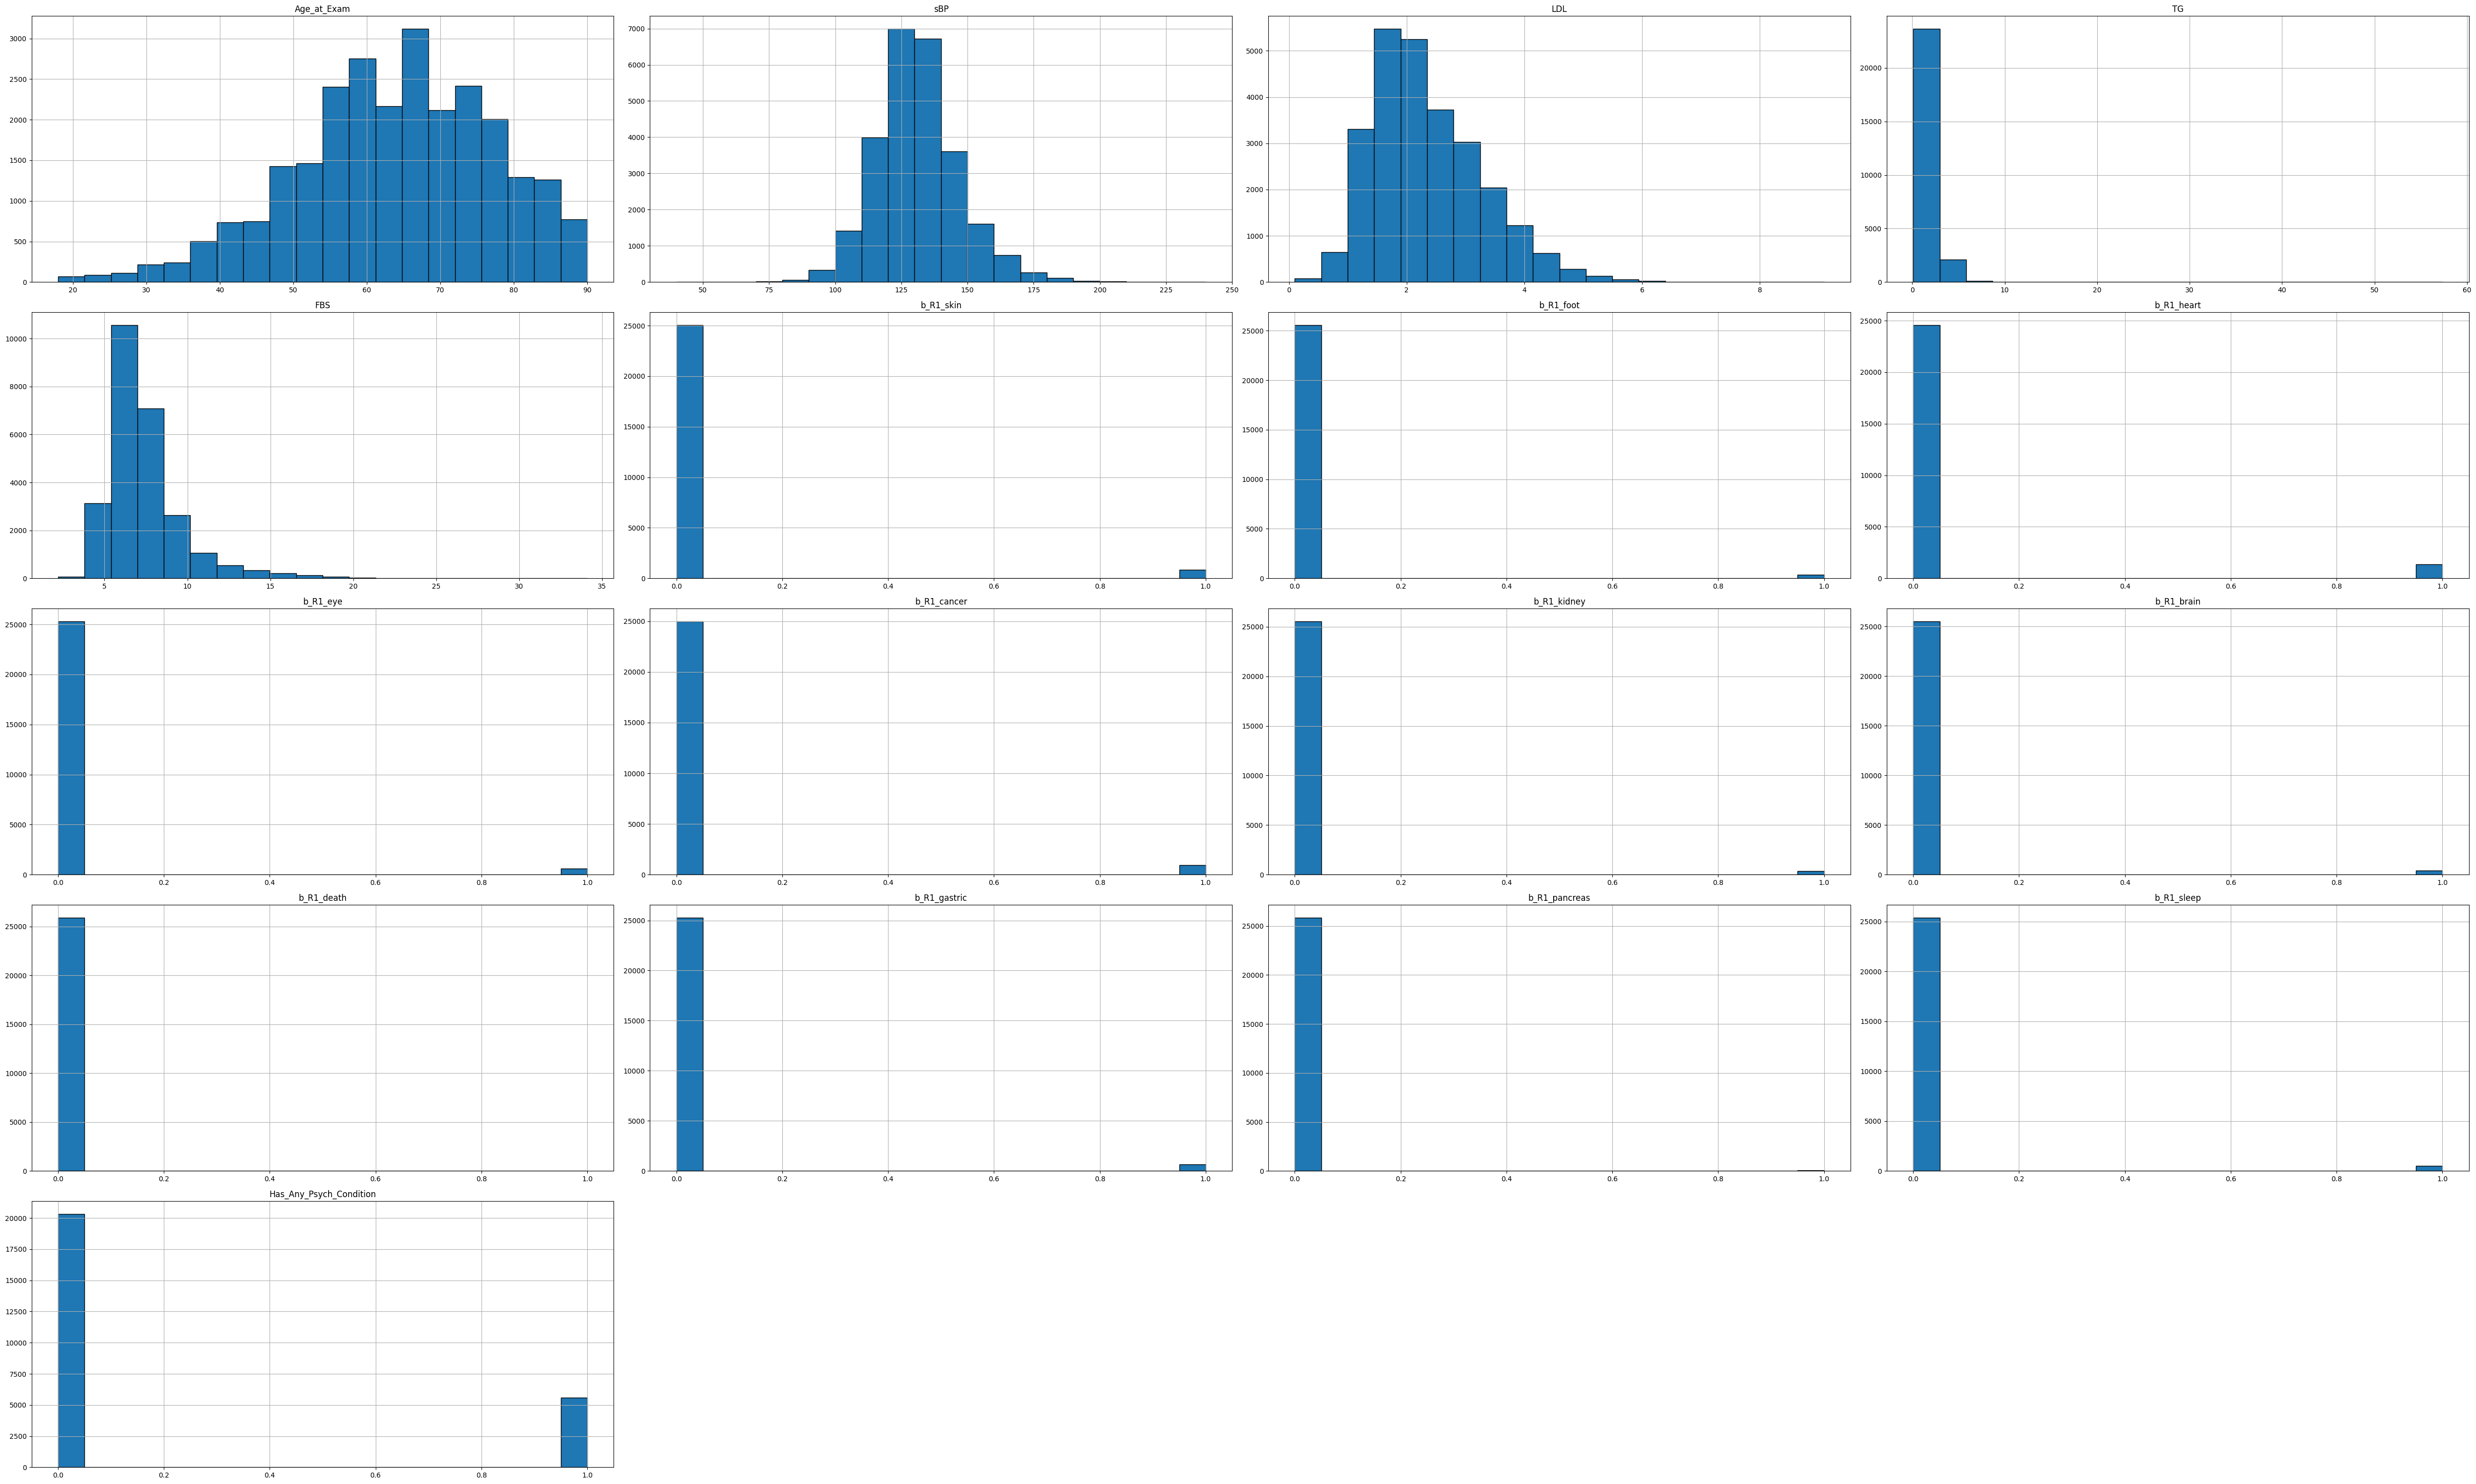

In [ ]:
# Histogram
bins = 20
selectedD.hist(figsize=(50, 30), bins=bins, edgecolor="black")

plt.tight_layout()
plt.show()

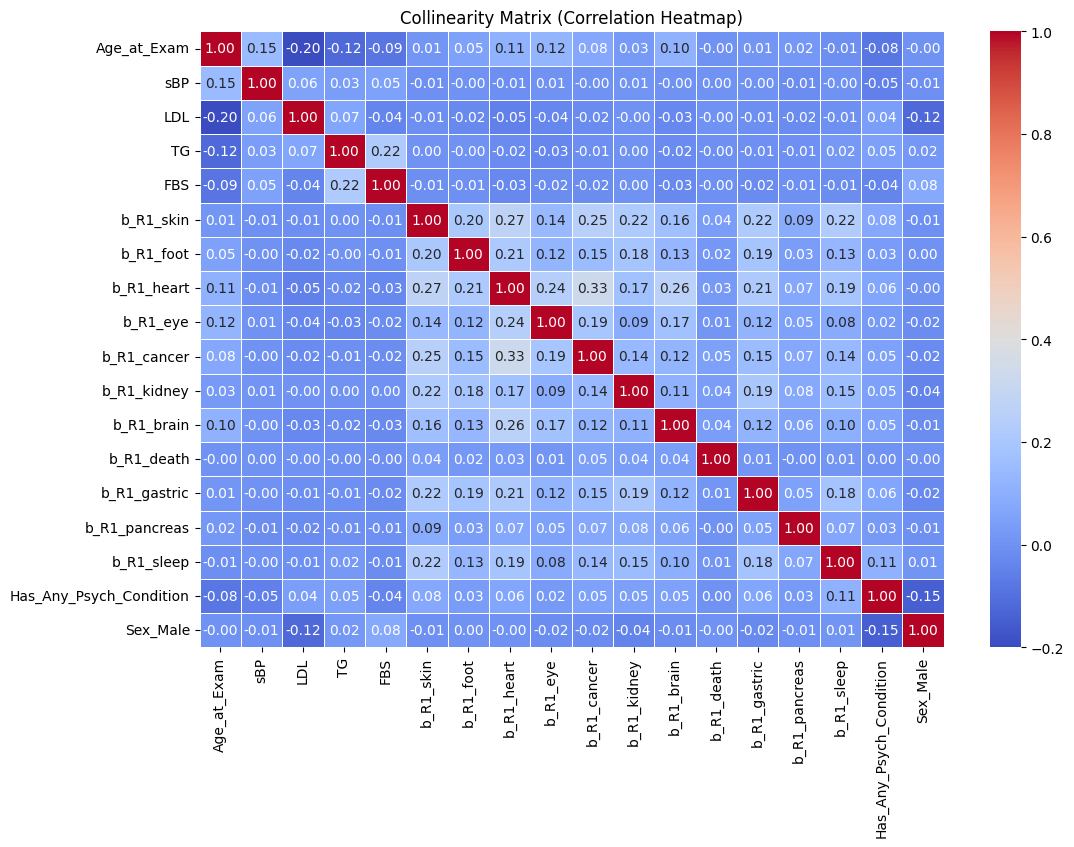

In [ ]:
# Compute the correlation matrix
corr_matrix = selectedD.corr()

plt.figure(figsize=(12, 8))

# Heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Collinearity Matrix (Correlation Heatmap)")
plt.show()

Non-diabetics

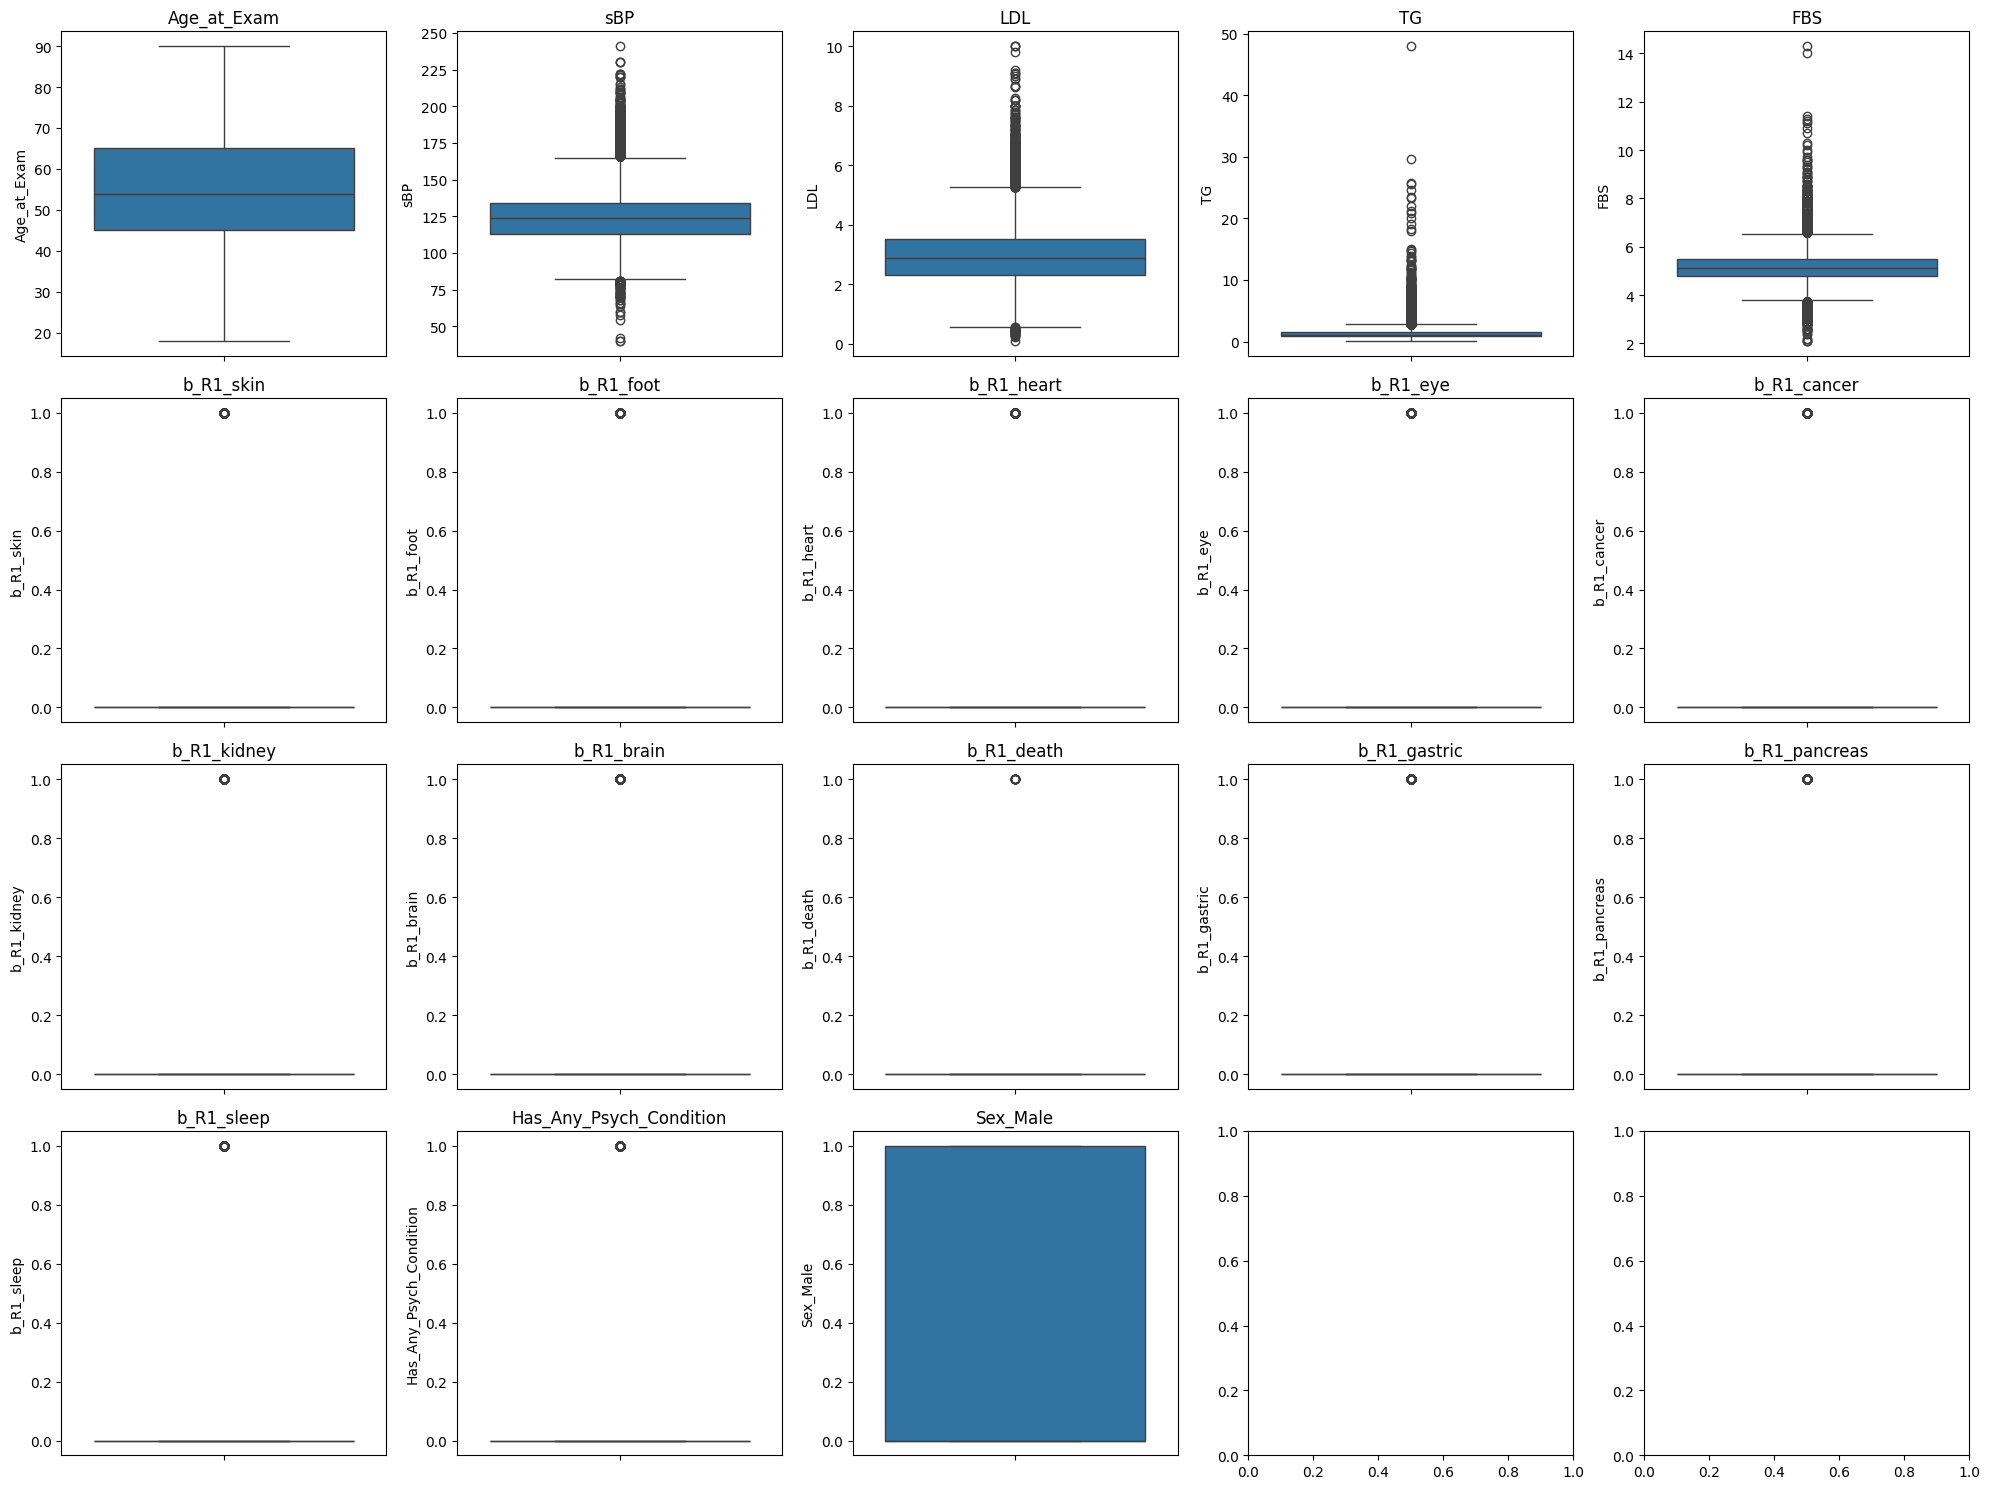

In [ ]:
# Box-Plot
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(selectedND.columns):
    sns.boxplot(y=selectedND[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

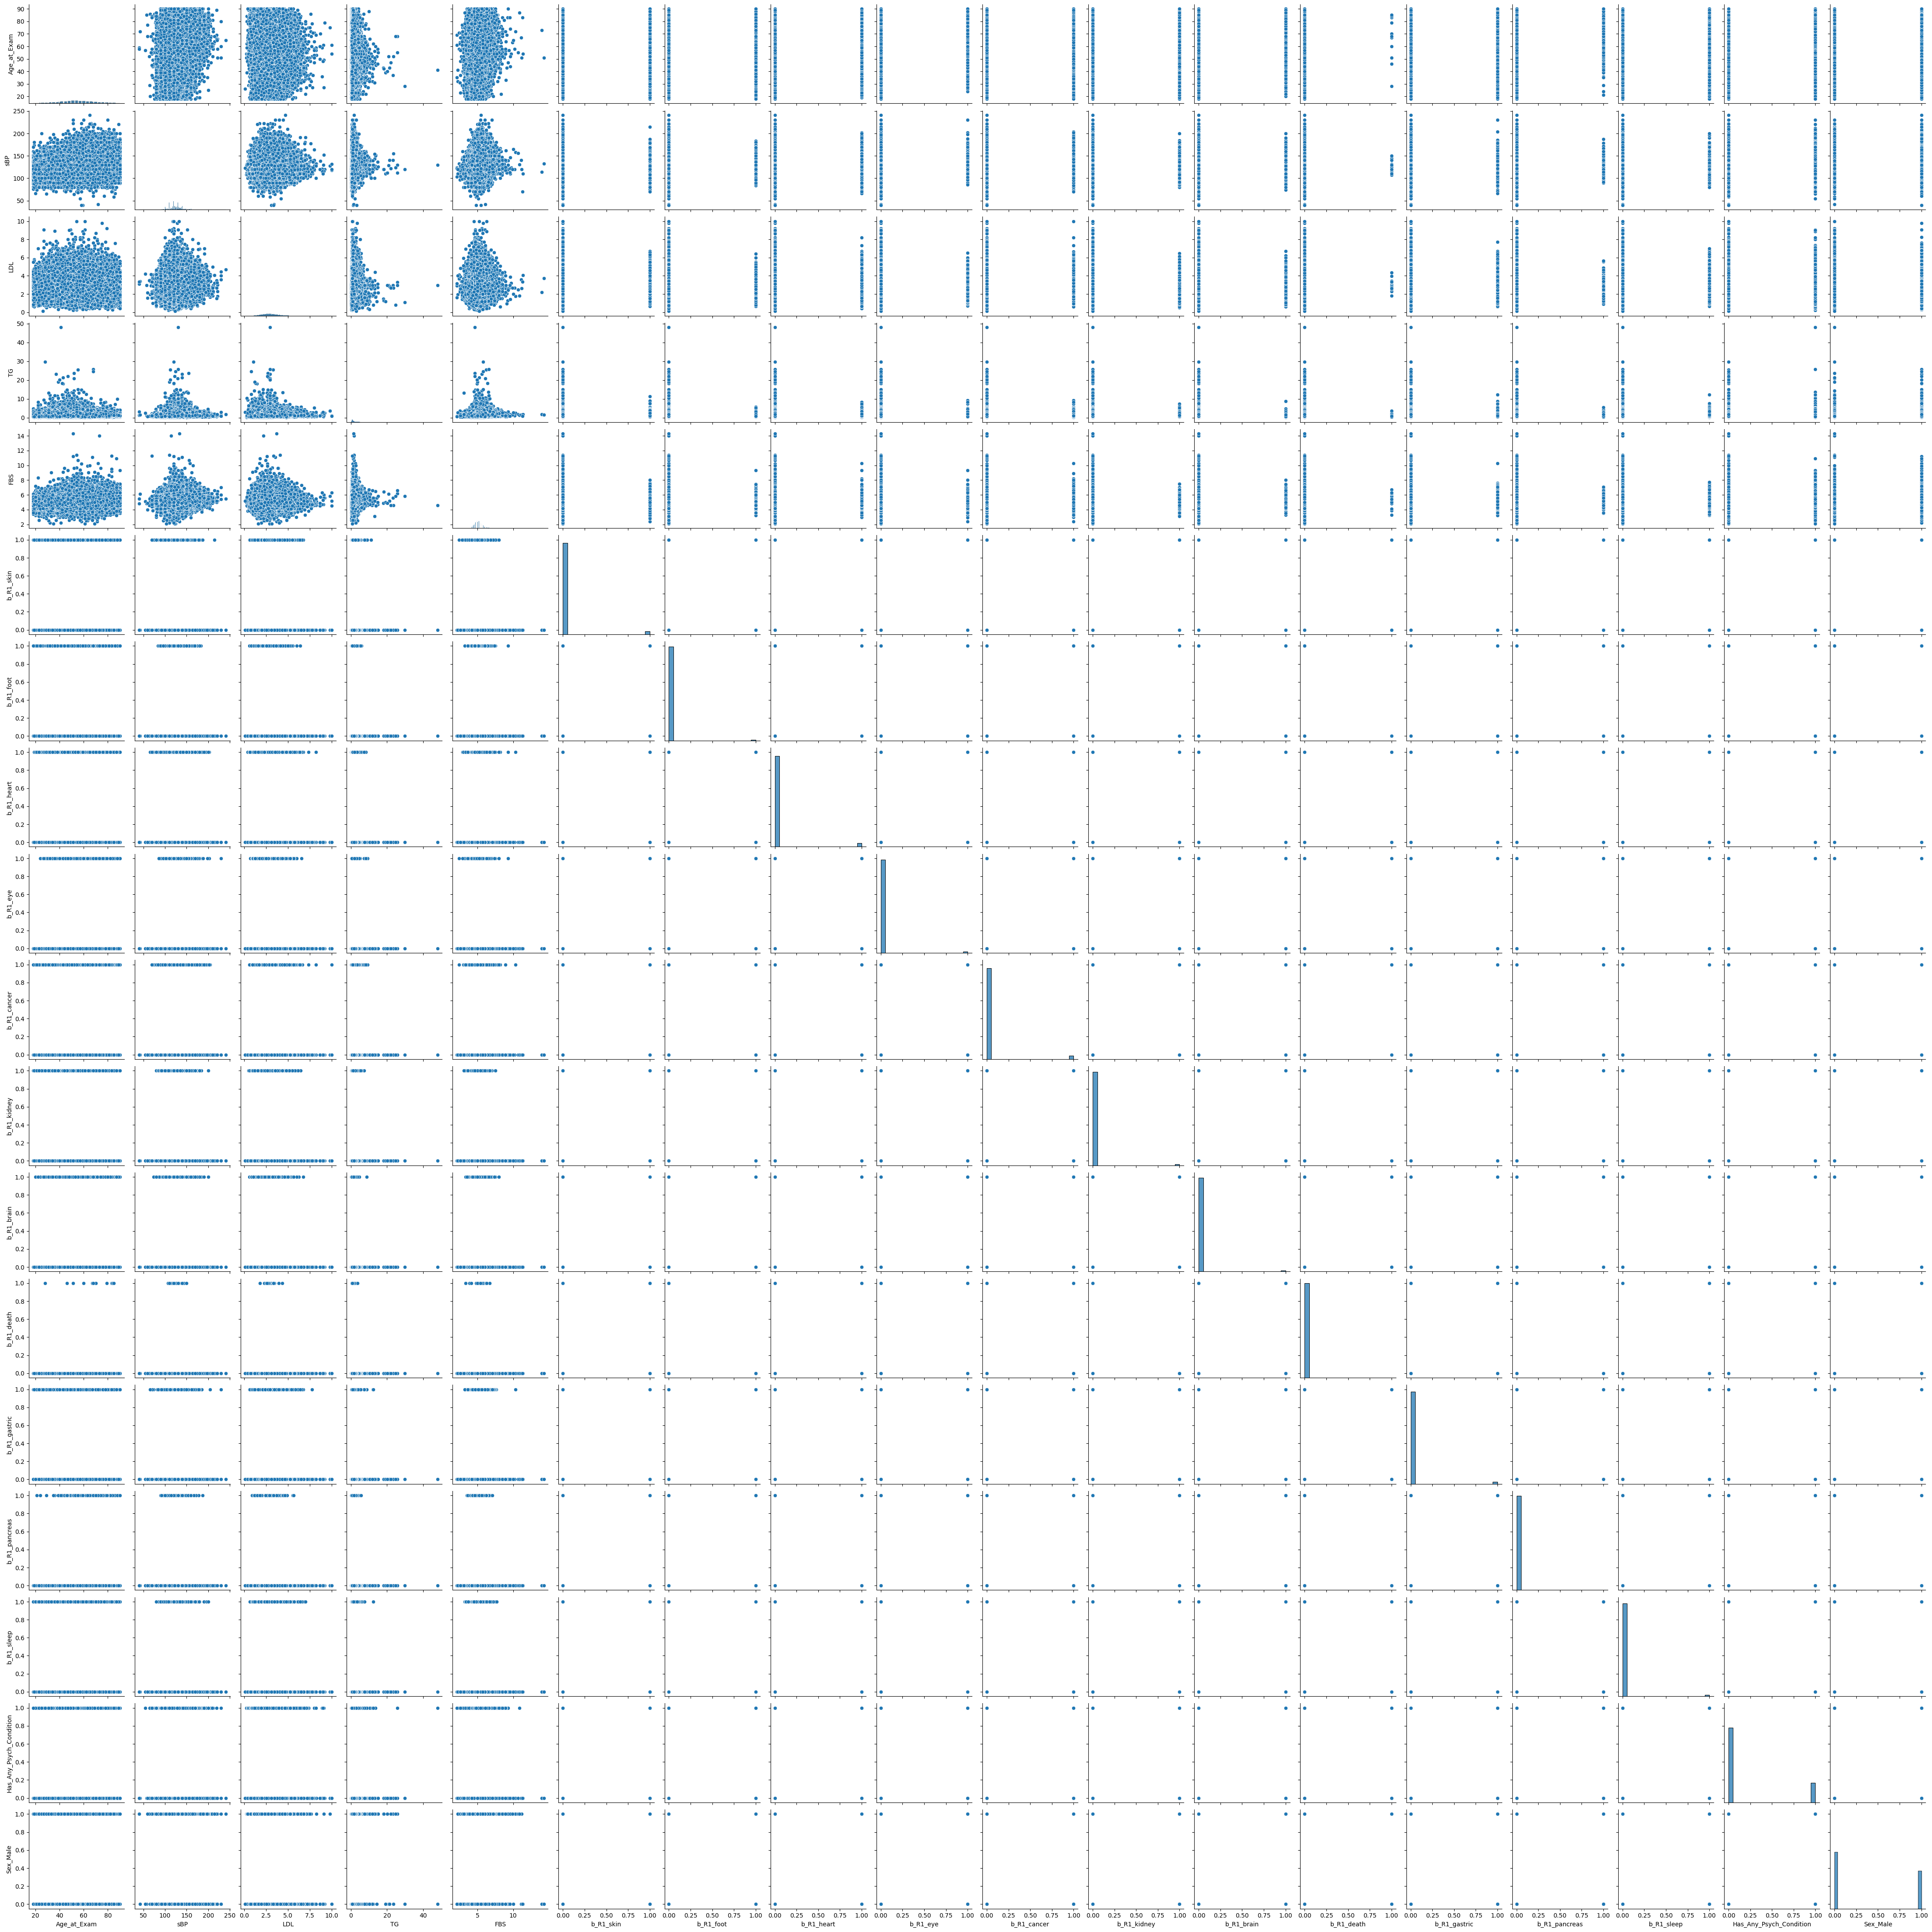

In [ ]:
# Scatter Plot Matrix
sns.pairplot(selectedND)
plt.show()

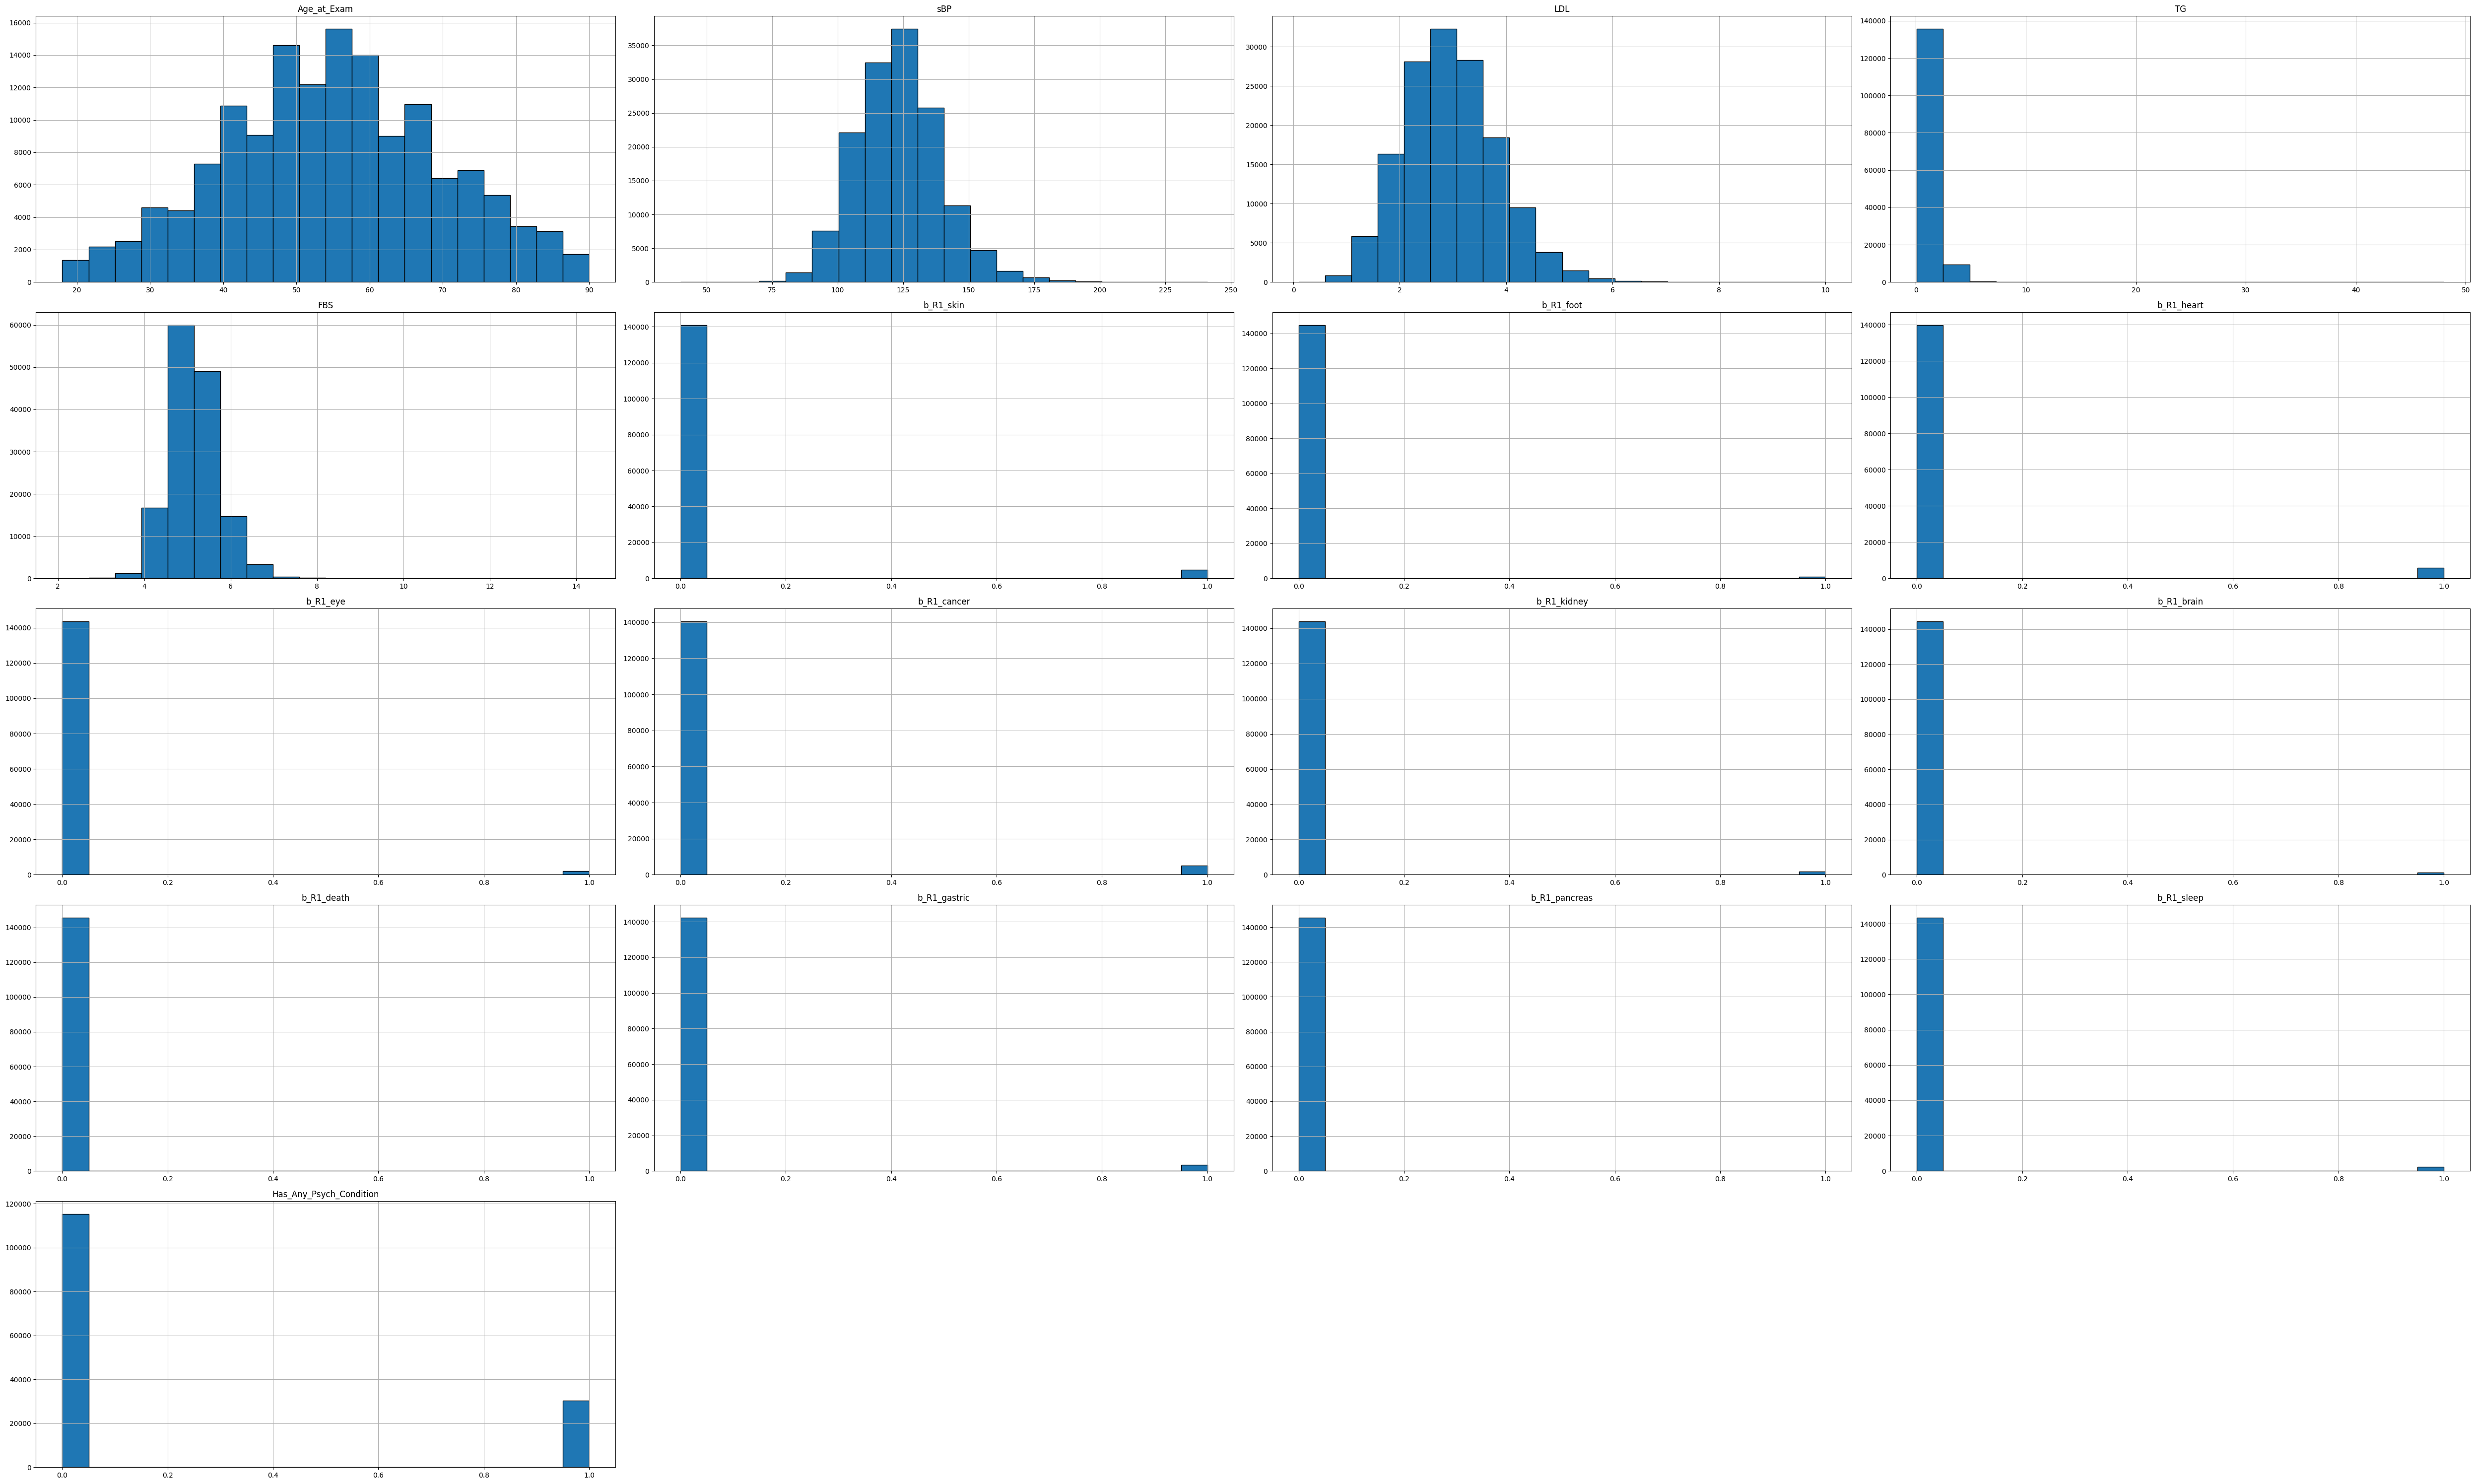

In [ ]:
# Histogram
bins = 20
selectedND.hist(figsize=(50, 30), bins=bins, edgecolor="black")

plt.tight_layout()
plt.show()

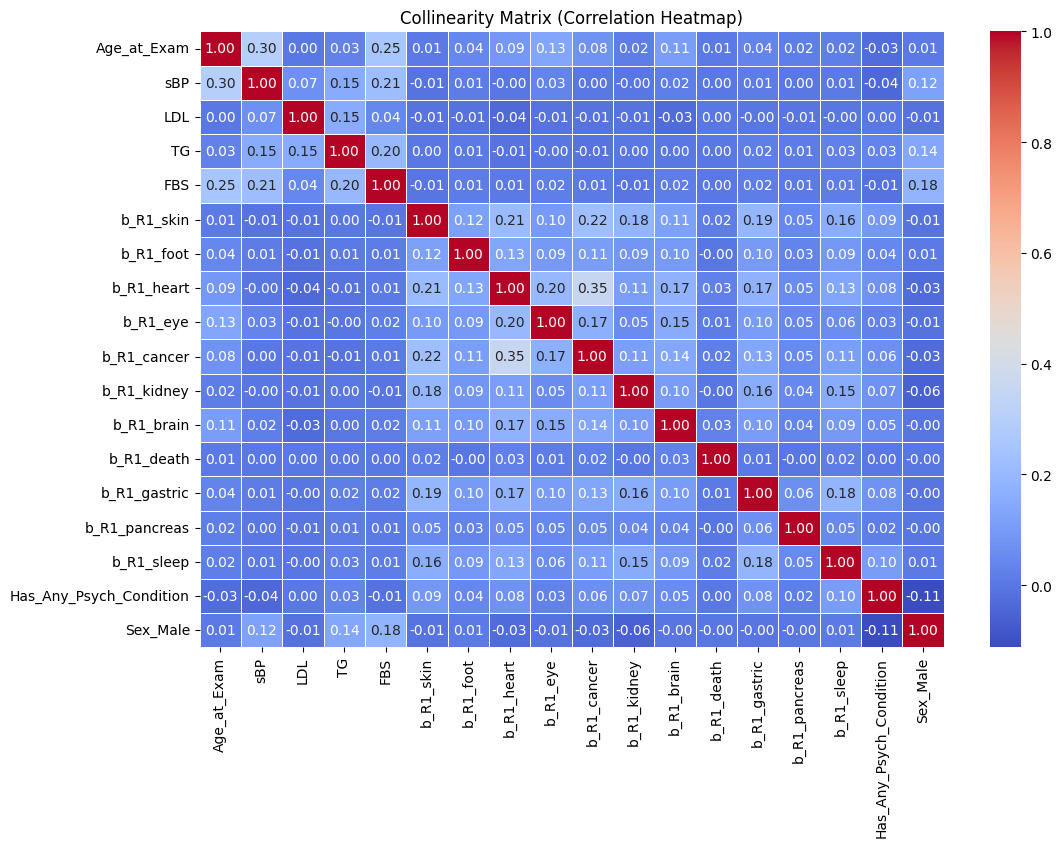

In [ ]:
# Compute the correlation matrix
corr_matrix = selectedND.corr()

plt.figure(figsize=(12, 8))

# Heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Collinearity Matrix (Correlation Heatmap)")
plt.show()

**Dataset 3:** All patients

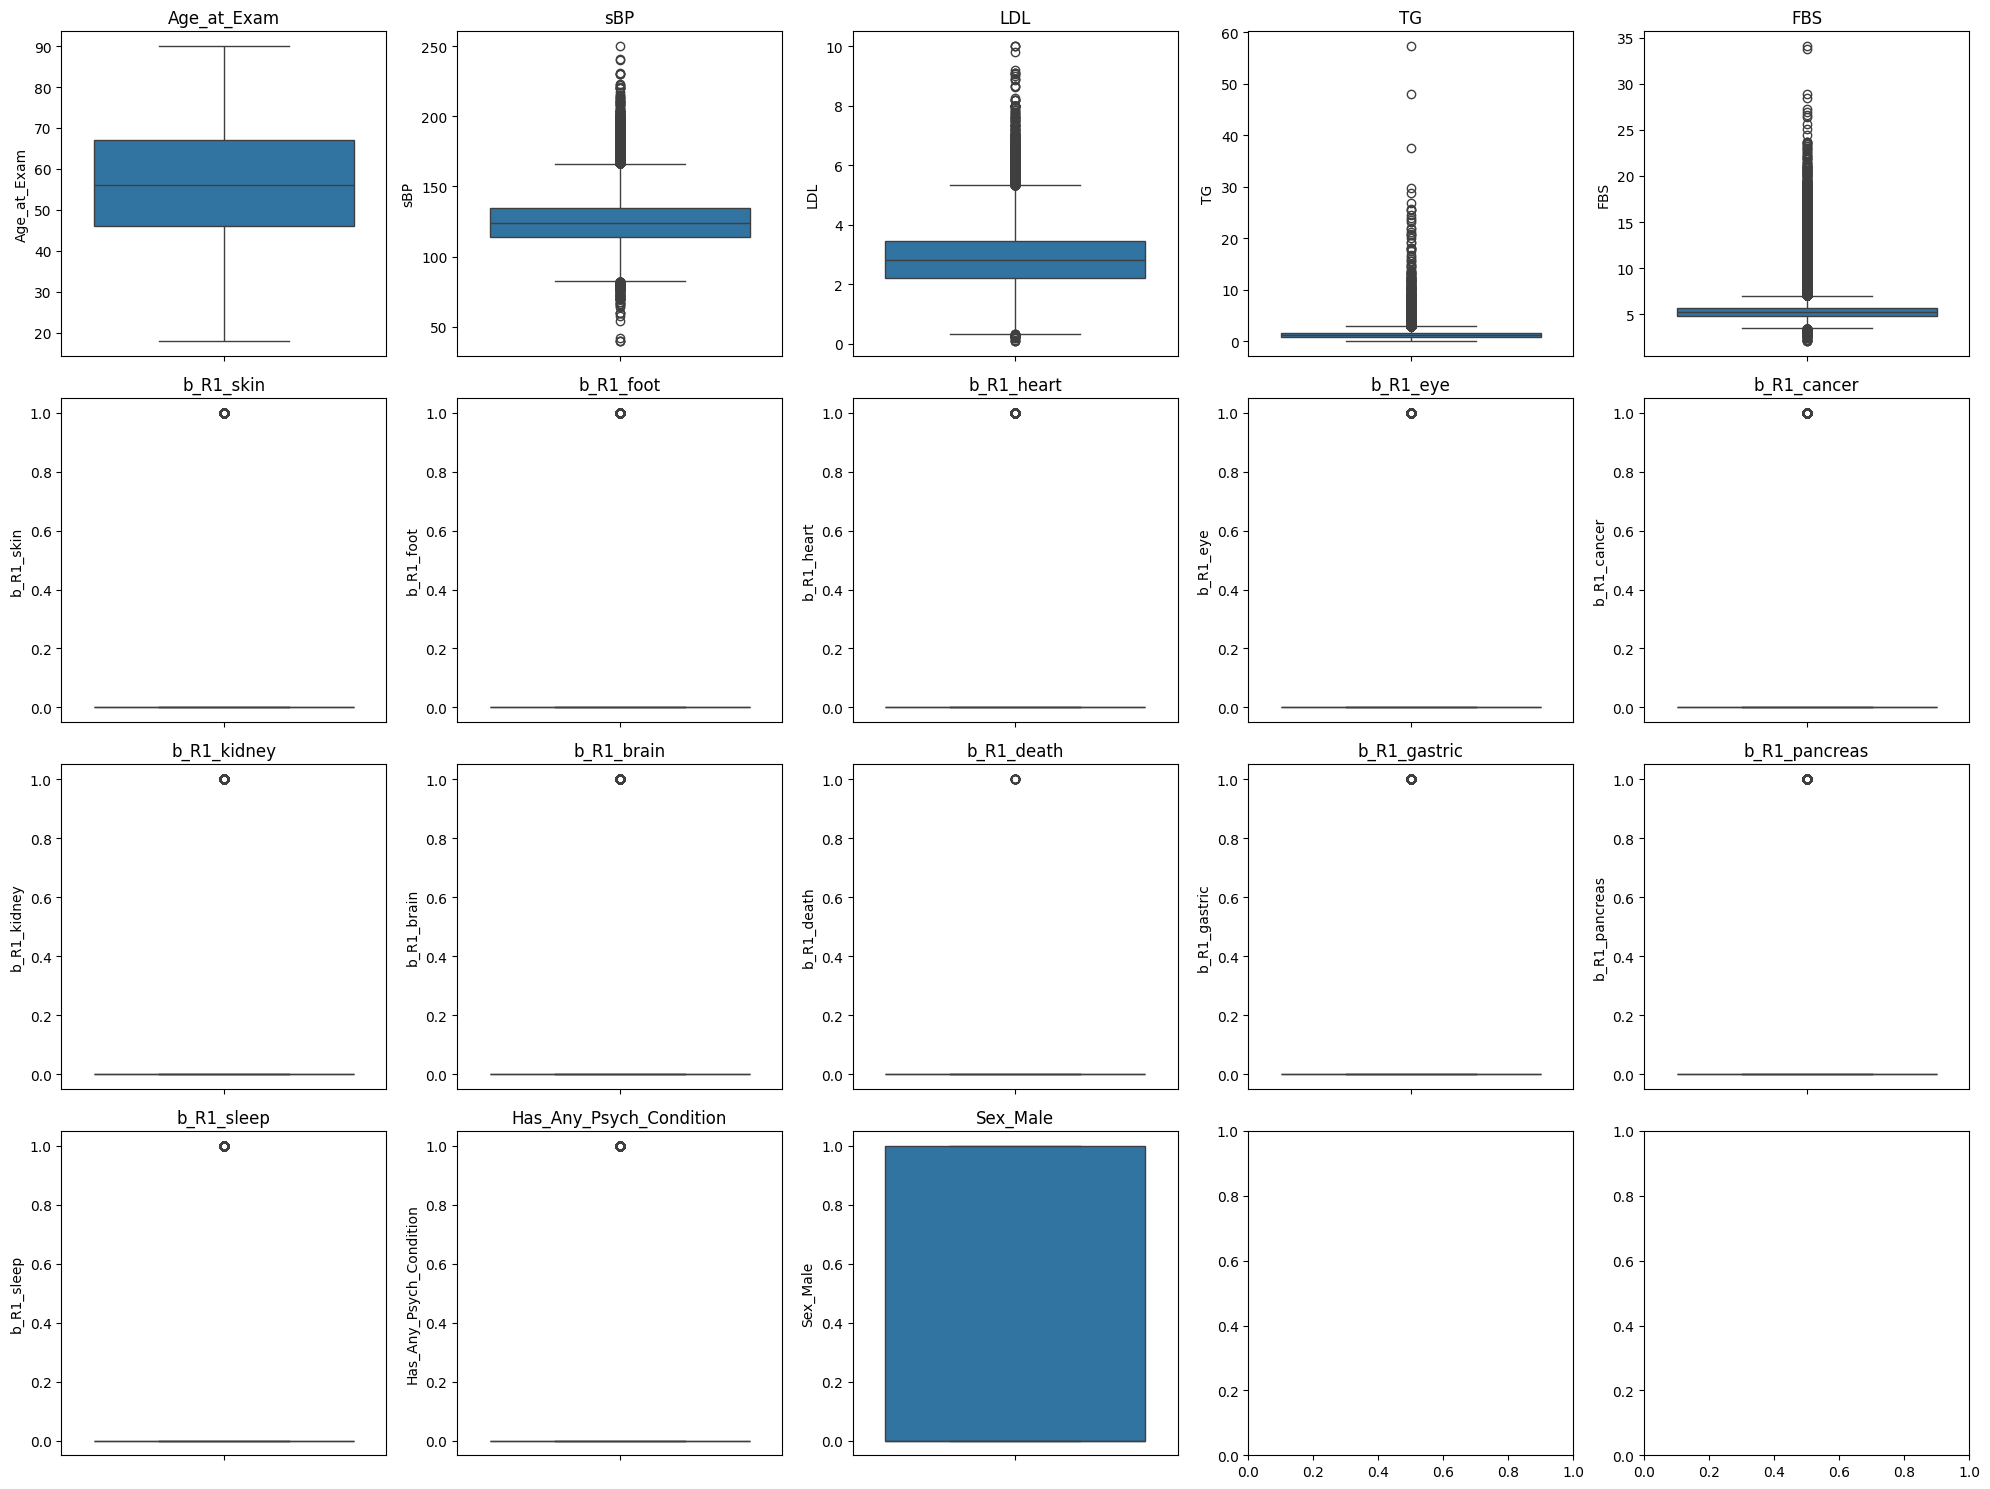

In [ ]:
# Box-Plot
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(selectedALL.columns):
    sns.boxplot(y=selectedALL[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

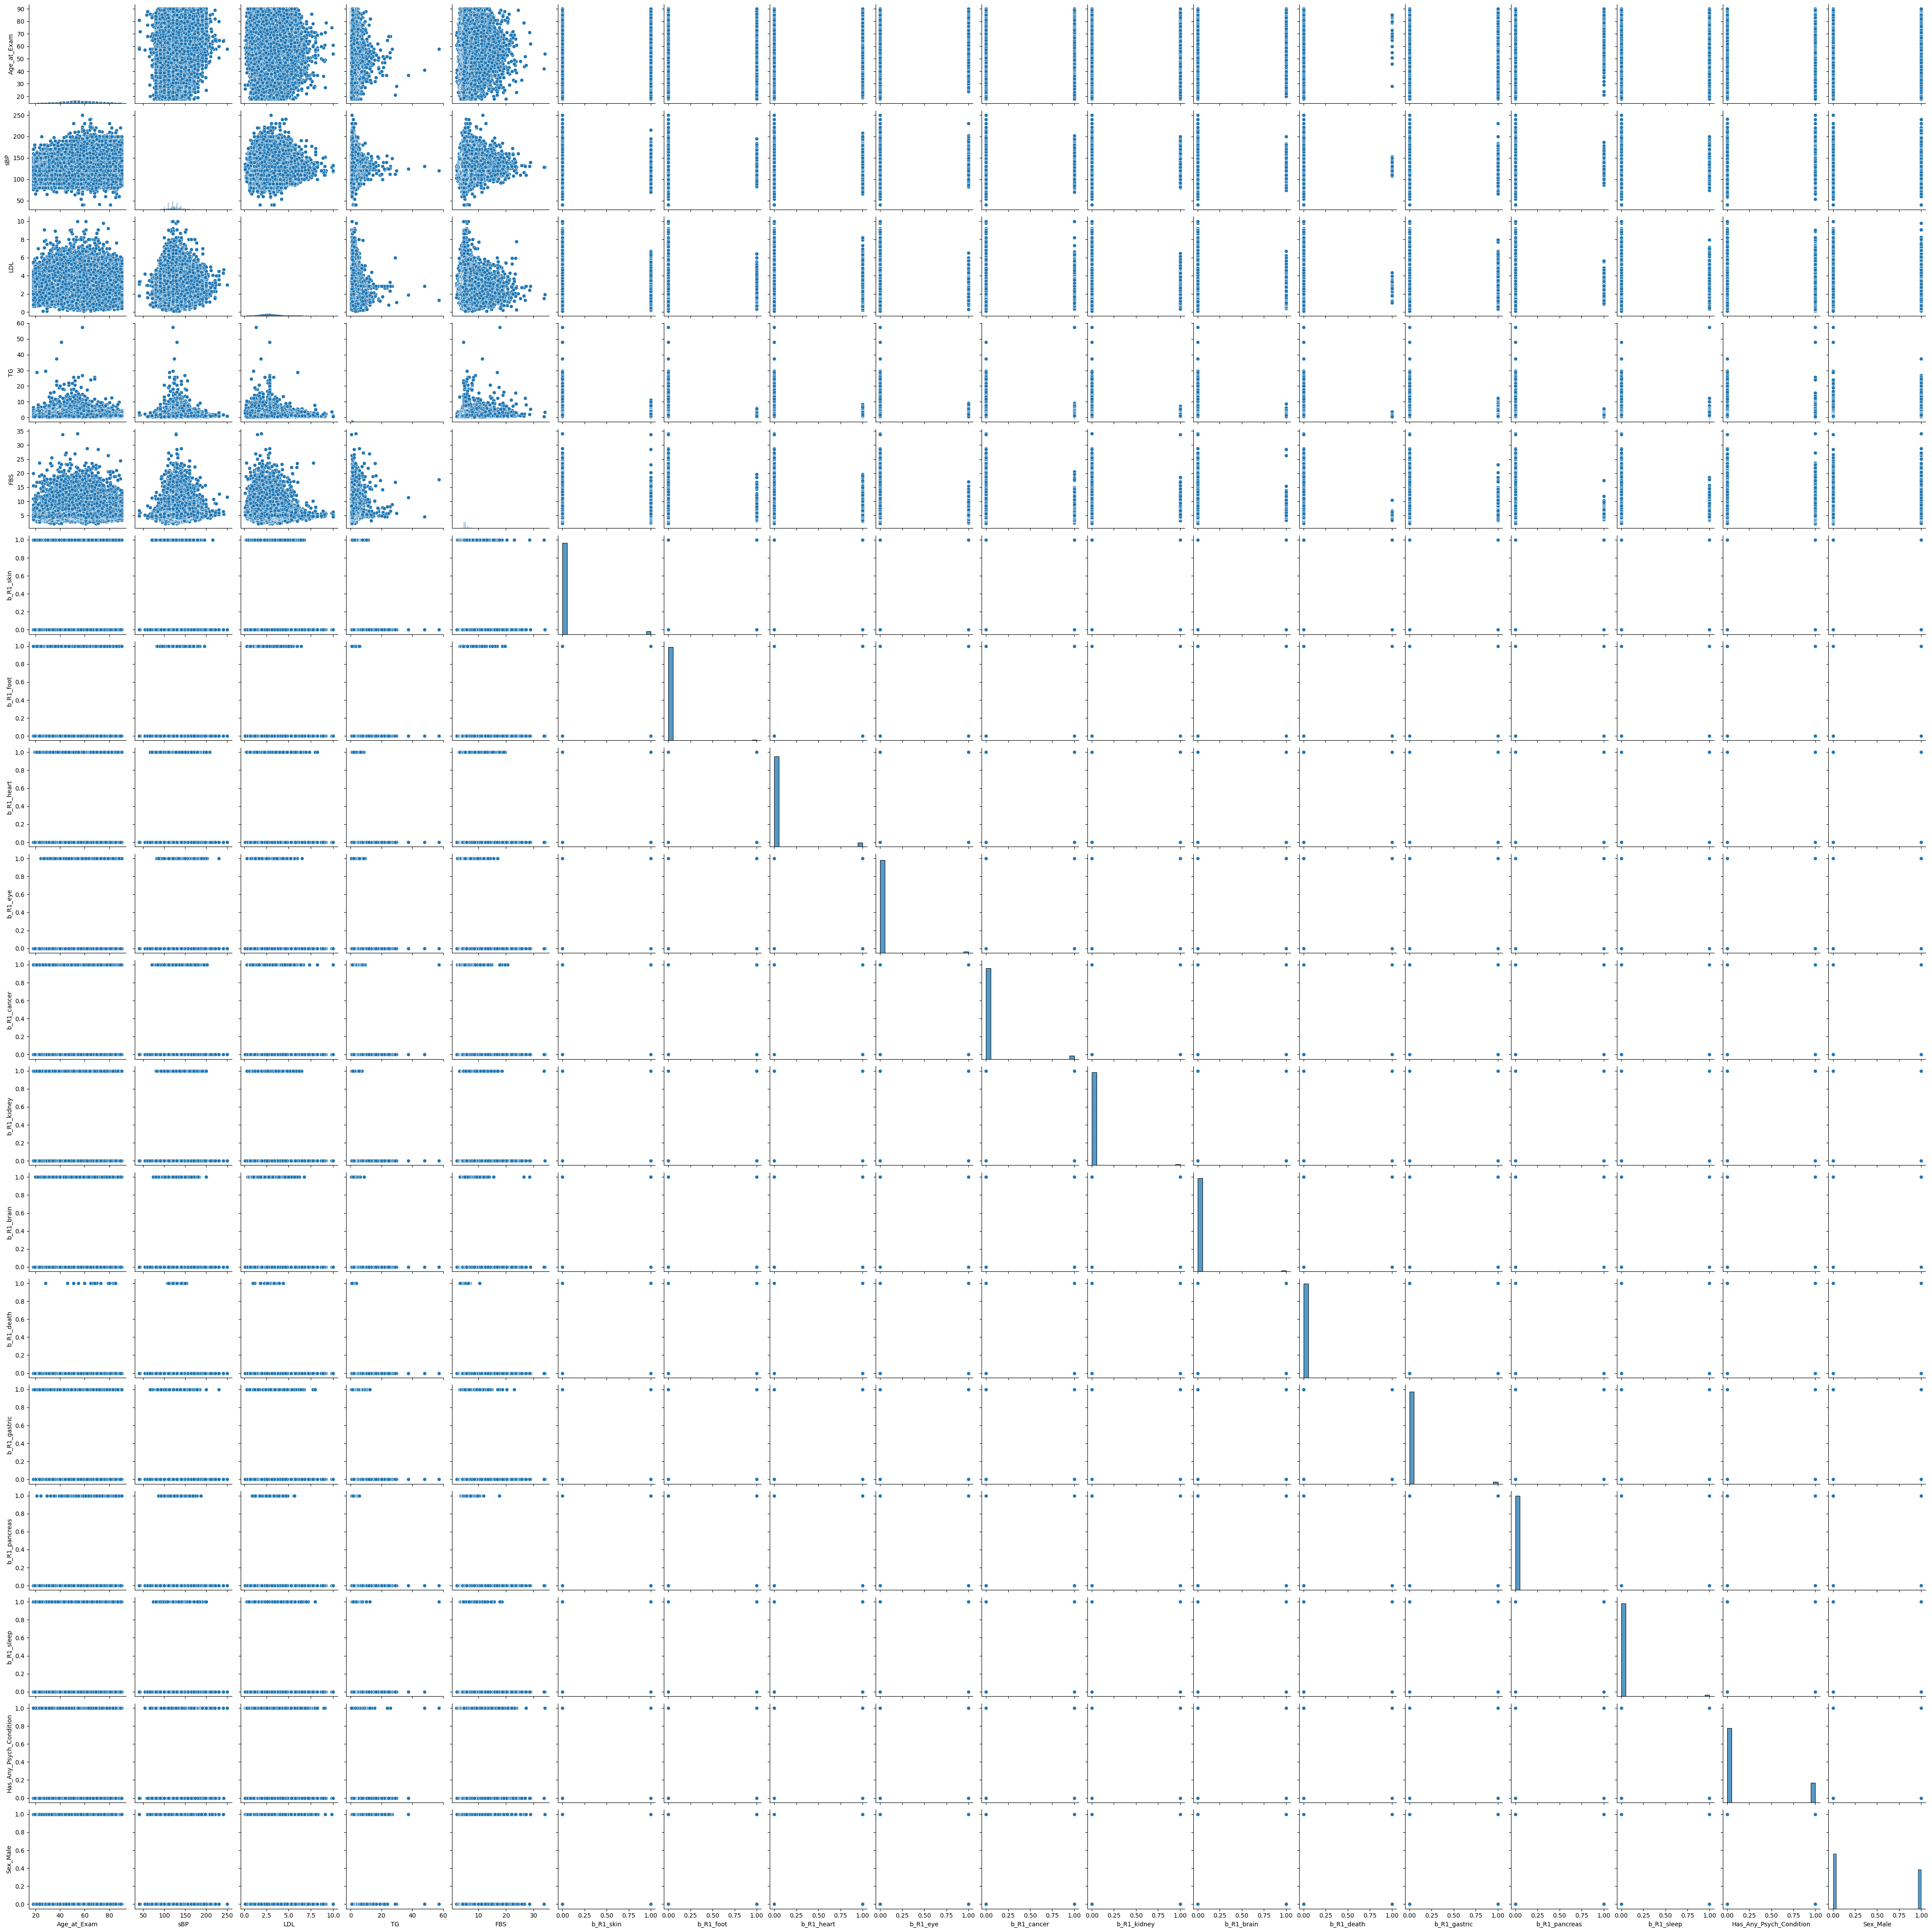

In [ ]:
# Scatter Plot Matrix
sns.pairplot(selectedALL)
plt.show()

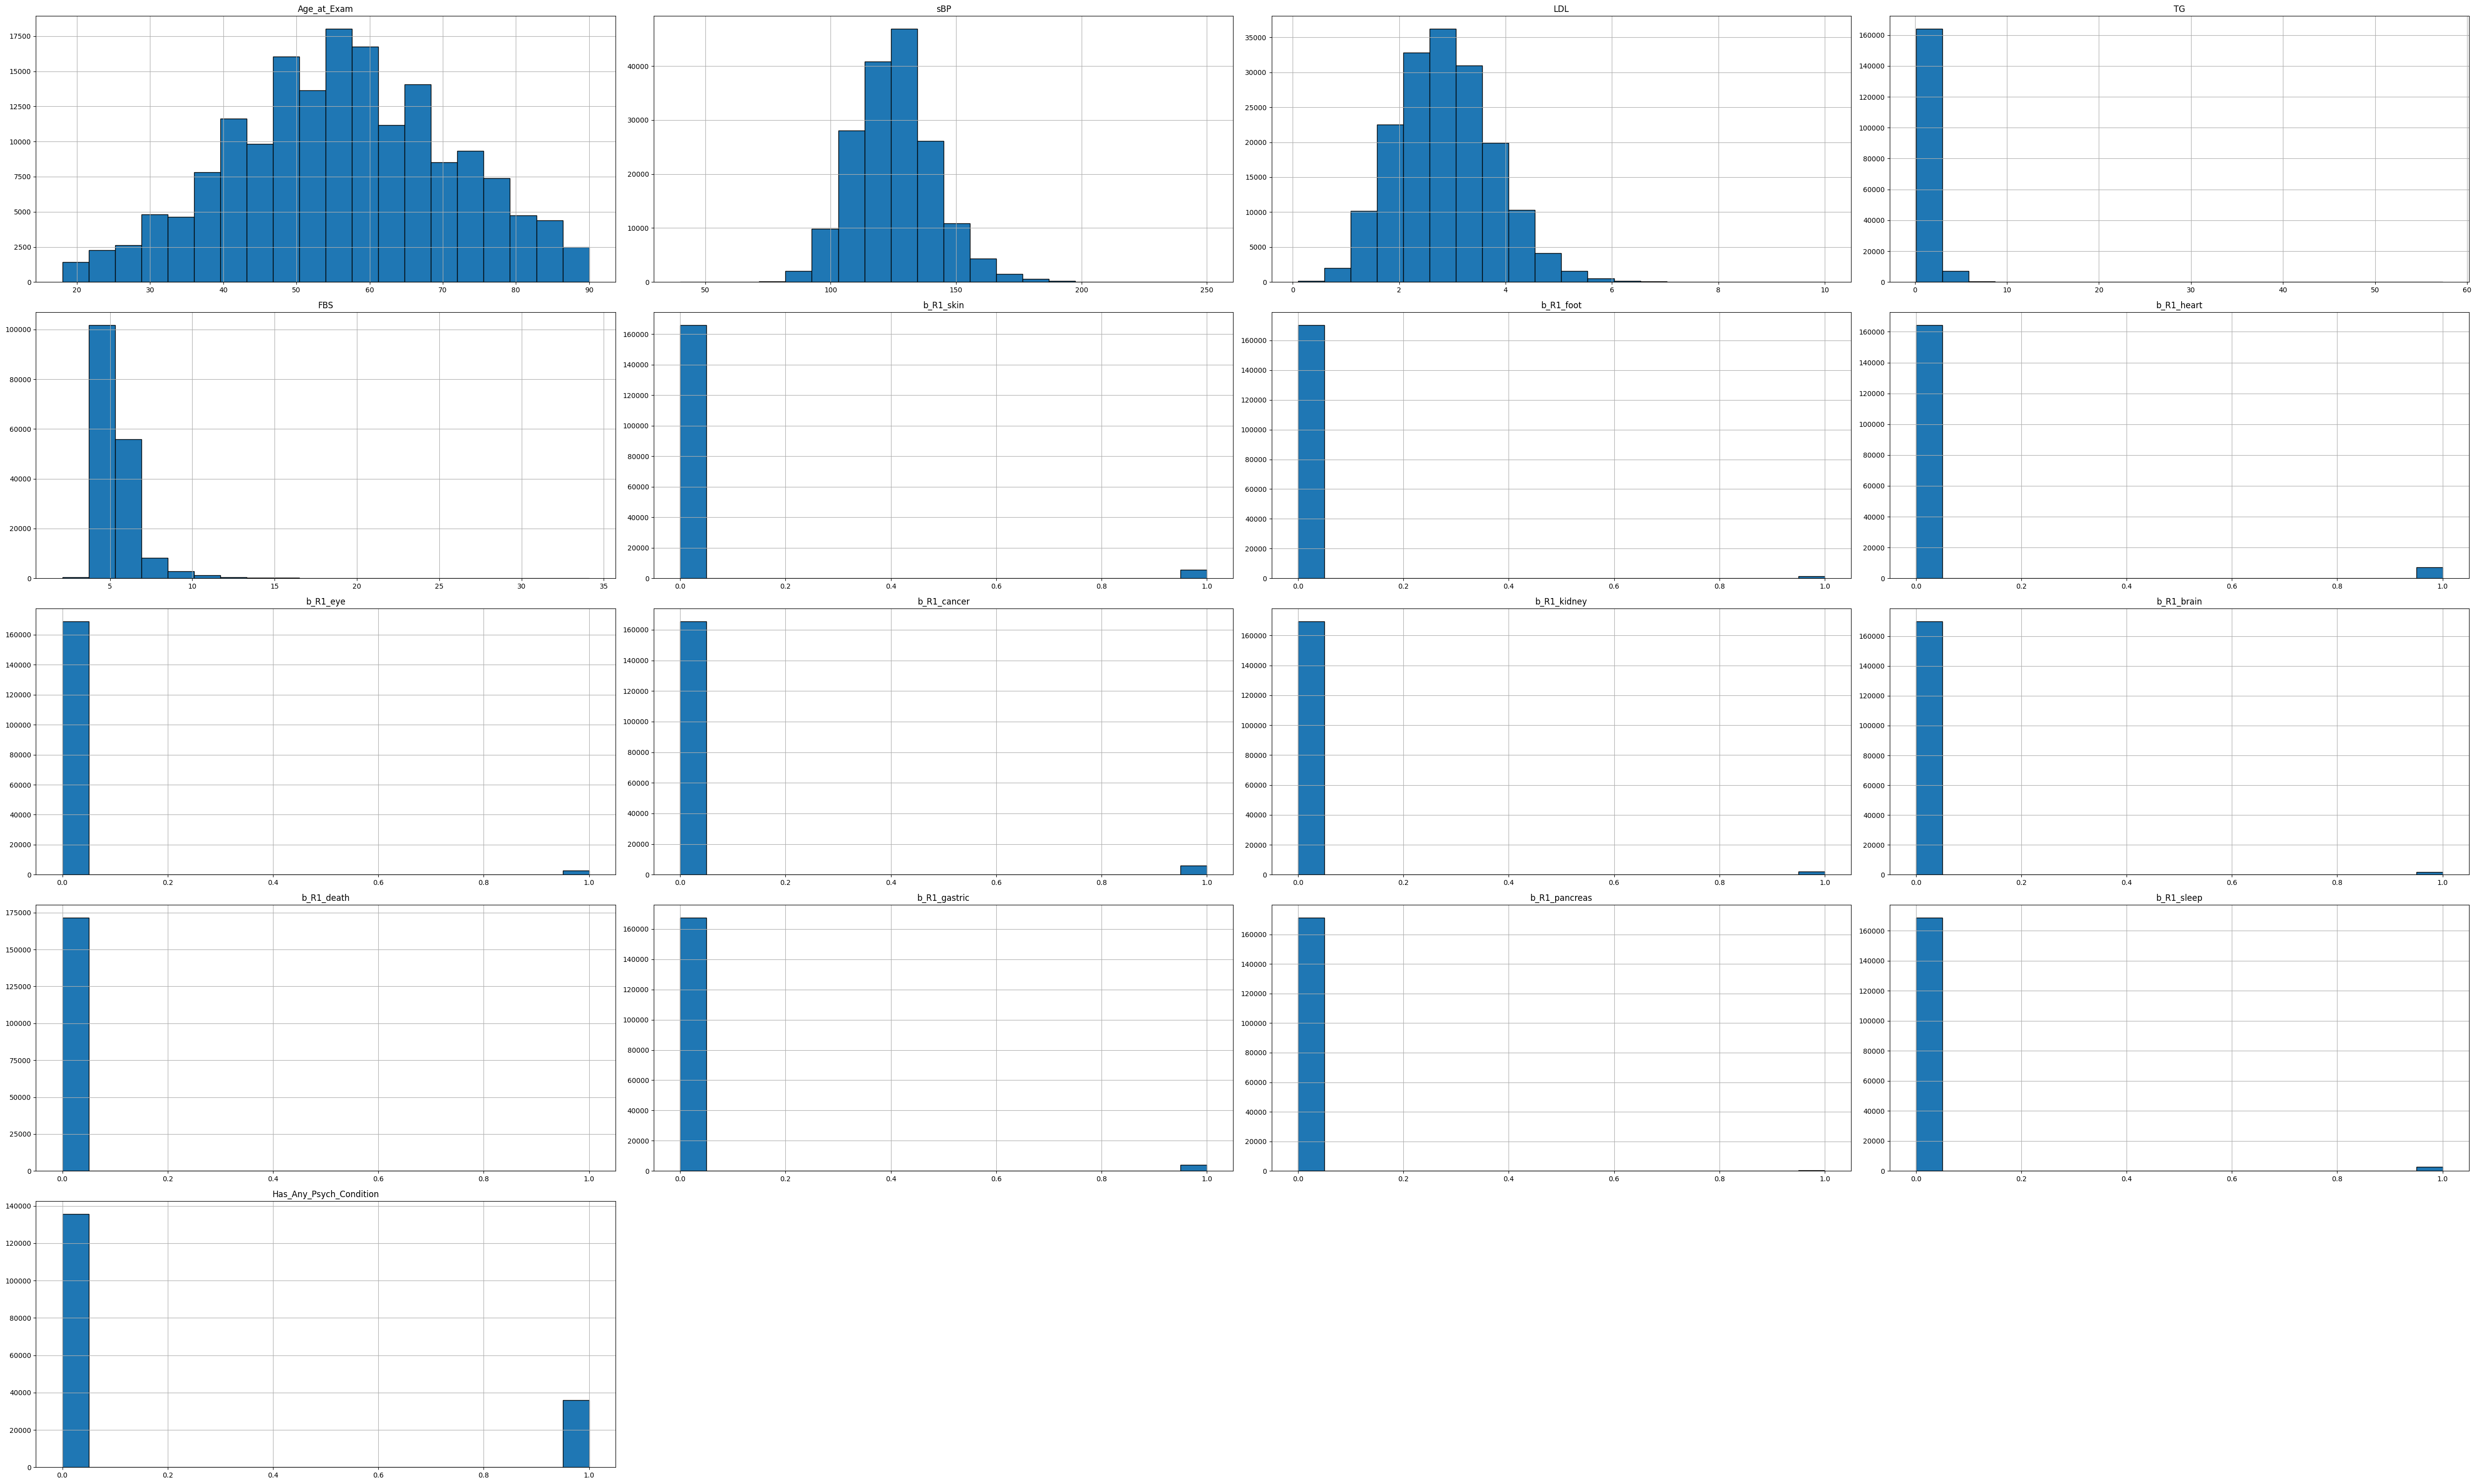

In [ ]:
# Histogram
bins = 20
selectedALL.hist(figsize=(50, 30), bins=bins, edgecolor="black")

plt.tight_layout()
plt.show()

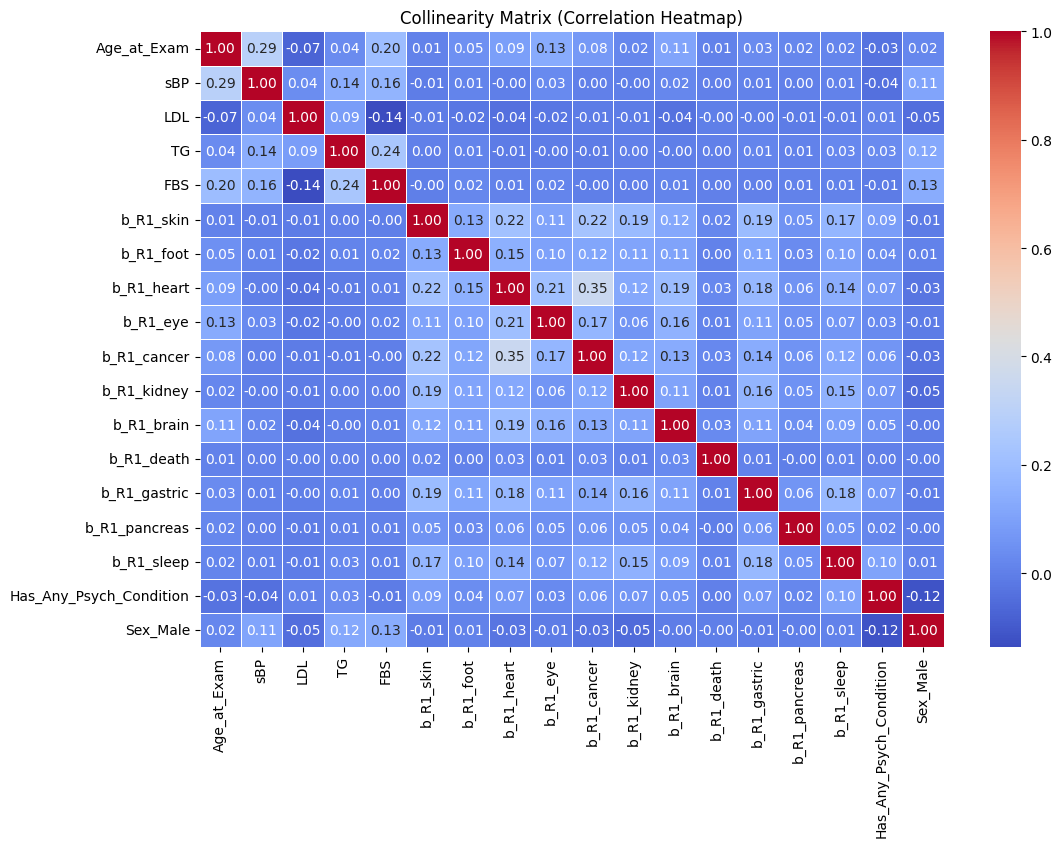

In [ ]:
# Compute the correlation matrix
corr_matrix = selectedALL.corr()

plt.figure(figsize=(12, 8))

# Heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Collinearity Matrix (Correlation Heatmap)")
plt.show()

#**K-Nearest Neighbour (K-NN) Model**


##**Model 1a:** Diabetes (Euclidean Distance)

In [ ]:
# Split the data into features and target variable
X = selectedD.drop('Has_Any_Psych_Condition', axis=1)
y = selectedD['Has_Any_Psych_Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Best k: 9 with mean accuracy: 0.7691


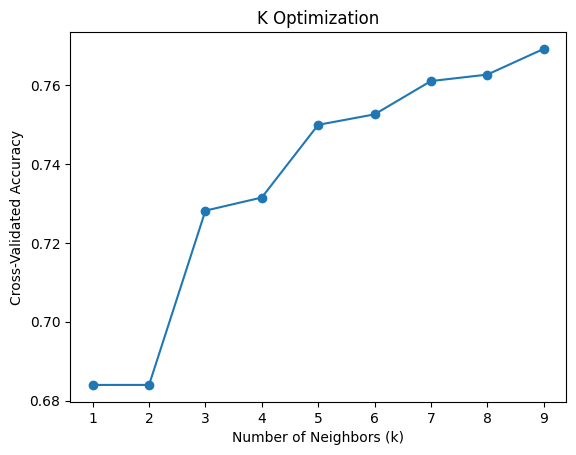

In [ ]:
# Hyperparameter Optimization
k_values = range(1, 10)
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())

best_k = k_values[np.argmax(mean_scores)]
print(f"Best k: {best_k} with mean accuracy: {max(mean_scores):.4f}")
# Results: K=9

# Plotting Results
import matplotlib.pyplot as plt
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K Optimization')
plt.show()

In [ ]:
# K-NN Model with distance-based weighting
knn = KNeighborsClassifier(n_neighbors=9, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3890  198]
 [ 982  114]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      4088
           1       0.37      0.10      0.16      1096

    accuracy                           0.77      5184
   macro avg       0.58      0.53      0.52      5184
weighted avg       0.71      0.77      0.72      5184



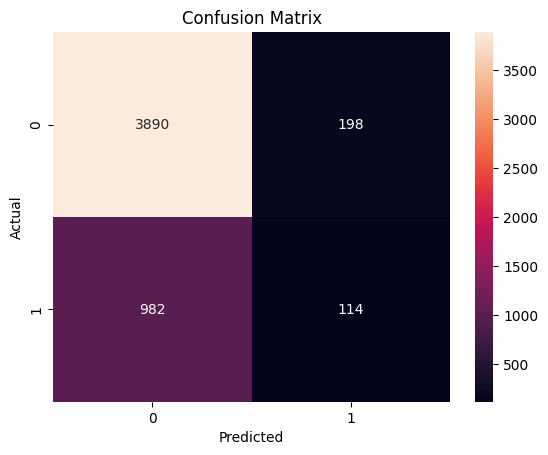

In [ ]:
# Confusion matirx figure
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

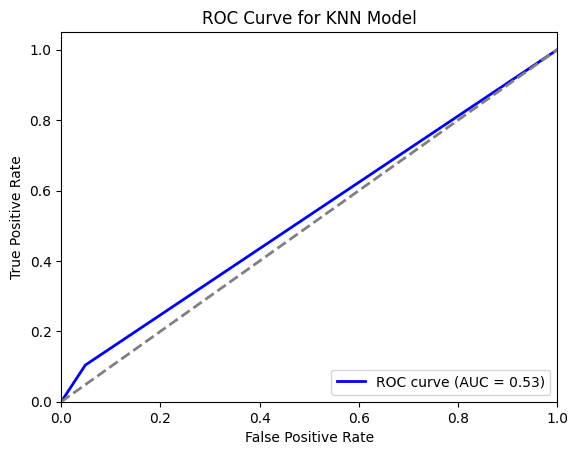

AUC Score: 0.53


In [ ]:
#ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model')
plt.legend(loc="lower right")
plt.show()
print(f"AUC Score: {roc_auc:.2f}")

##**Model 1b:** Diabetes (Hamming Distance)

In [ ]:
# Split the data into features and target variable
X = selectedD.drop('Has_Any_Psych_Condition', axis=1)
y = selectedD['Has_Any_Psych_Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Best k: 8 with mean accuracy: 0.7730


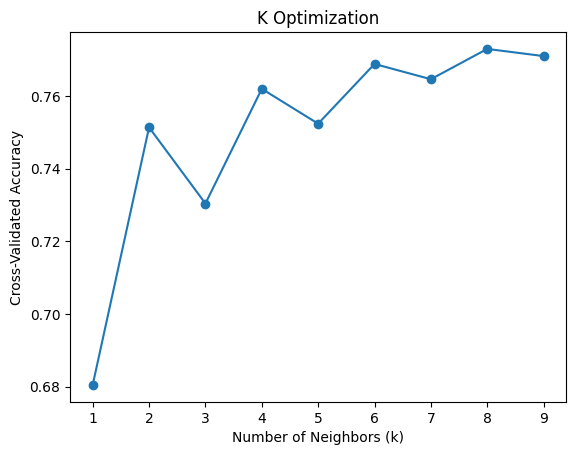

In [ ]:
# Hyperparameter Optimization
k_values = range(1, 10)
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='hamming')
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())

best_k = k_values[np.argmax(mean_scores)]
print(f"Best k: {best_k} with mean accuracy: {max(mean_scores):.4f}")
# Results: K=8

# Plotting Results
import matplotlib.pyplot as plt
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K Optimization')
plt.show()

In [ ]:
# K-NN Model with distance-based weighting
knn = KNeighborsClassifier(n_neighbors=8, weights='distance', metric='hamming')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3970  118]
 [1019   77]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.87      4088
           1       0.39      0.07      0.12      1096

    accuracy                           0.78      5184
   macro avg       0.60      0.52      0.50      5184
weighted avg       0.71      0.78      0.72      5184



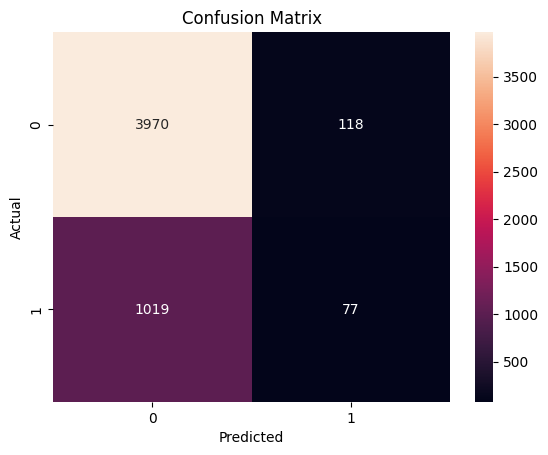

In [ ]:
#Confusion matrix figure
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

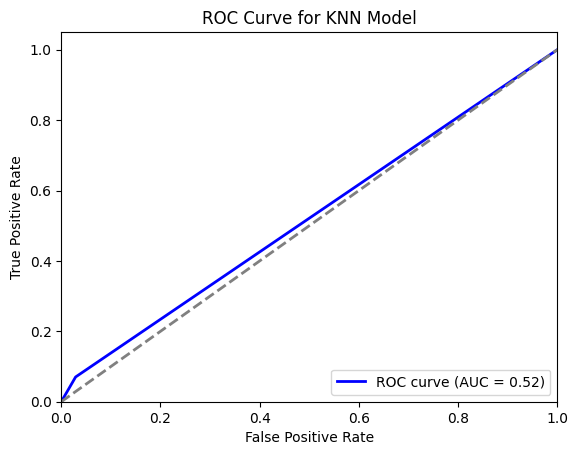

AUC Score: 0.52


In [ ]:
#ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model')
plt.legend(loc="lower right")
plt.show()
print(f"AUC Score: {roc_auc:.2f}")

##**Model 2a:** No Diabetes (Euclidean Distance)

In [ ]:
# Split the data into features and target variable
X = selectedND.drop('Has_Any_Psych_Condition', axis=1)
y = selectedND['Has_Any_Psych_Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # transform the test set

Best k: 9 with mean accuracy: 0.7777


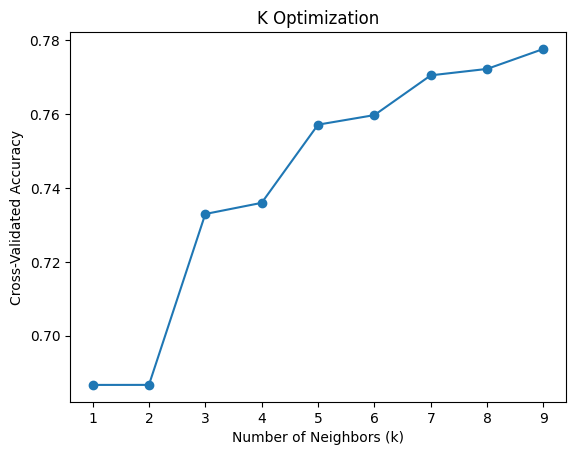

In [ ]:
# Hyperparameter Optimization
k_values = range(1, 10)
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())

best_k = k_values[np.argmax(mean_scores)]
print(f"Best k: {best_k} with mean accuracy: {max(mean_scores):.4f}")
# Results: K=9

# Plotting Results
import matplotlib.pyplot as plt
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K Optimization')
plt.show()

In [ ]:
# K-NN Model with distance-based weighting
knn = KNeighborsClassifier(n_neighbors=9, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22146   955]
 [ 5537   502]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     23101
           1       0.34      0.08      0.13      6039

    accuracy                           0.78     29140
   macro avg       0.57      0.52      0.50     29140
weighted avg       0.71      0.78      0.72     29140



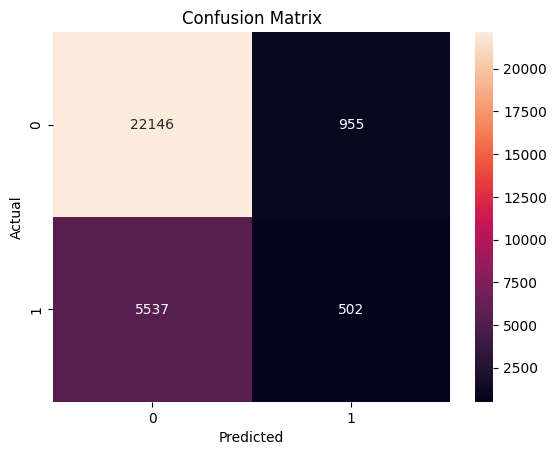

In [ ]:
#Confusion matrix figure
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

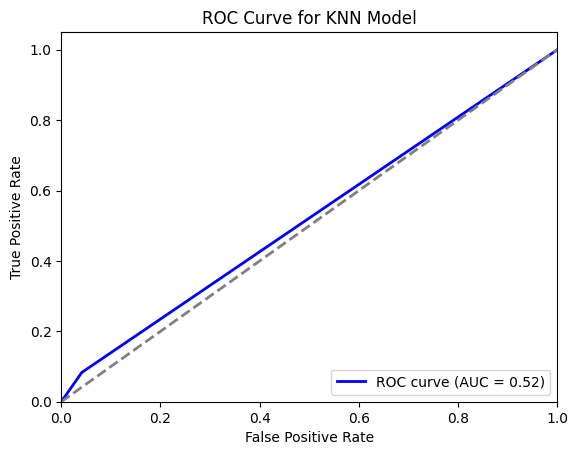

AUC Score: 0.52


In [ ]:
#ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model')
plt.legend(loc="lower right")
plt.show()
print(f"AUC Score: {roc_auc:.2f}")

##**Model 2b:** No Diabetes (Hamming Distance)

In [ ]:
# Split the data into features and target variable
X = selectedND.drop('Has_Any_Psych_Condition', axis=1)
y = selectedND['Has_Any_Psych_Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # transform the test set

Best k: 9 with mean accuracy: 0.7815


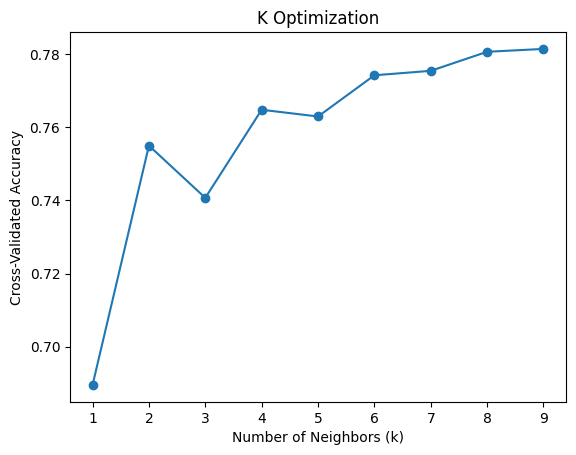

In [ ]:
# Hyperparameter Optimization
k_values = range(1, 10)
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='hamming')
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())

best_k = k_values[np.argmax(mean_scores)]
print(f"Best k: {best_k} with mean accuracy: {max(mean_scores):.4f}")
# Results: K=6

# Plotting Results
import matplotlib.pyplot as plt
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K Optimization')
plt.show()

In [ ]:
# K-NN Model with distance-based weighting
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='hamming')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22477   624]
 [ 5745   294]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     23101
           1       0.32      0.05      0.08      6039

    accuracy                           0.78     29140
   macro avg       0.56      0.51      0.48     29140
weighted avg       0.70      0.78      0.71     29140



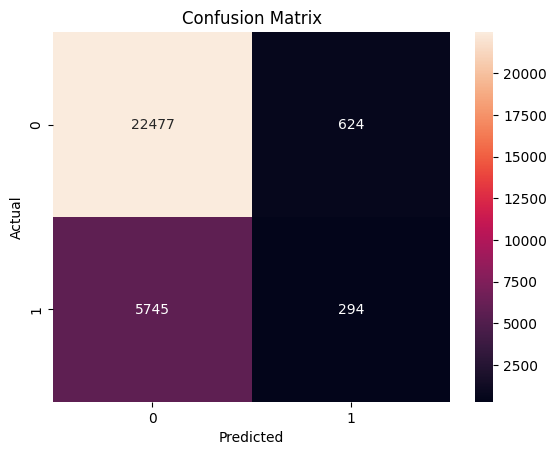

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

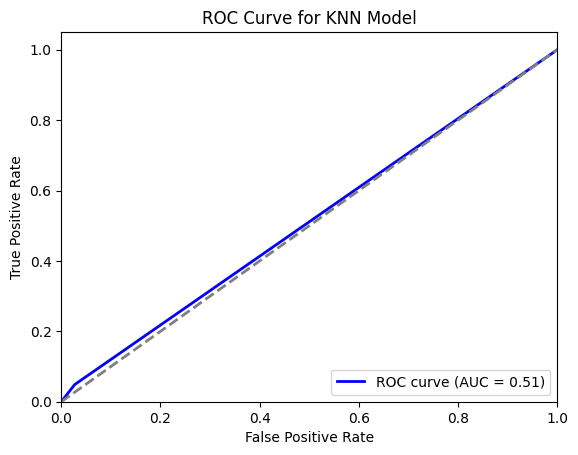

AUC Score: 0.51


In [ ]:
#ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model')
plt.legend(loc="lower right")
plt.show()
print(f"AUC Score: {roc_auc:.2f}")

##**Model 3a:** All Patients (Euclidean Distance)

In [ ]:
# Split the data into features and target variable
X = selectedALL.drop('Has_Any_Psych_Condition', axis=1)
y = selectedALL['Has_Any_Psych_Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Best k: 9 with mean accuracy: 0.7776


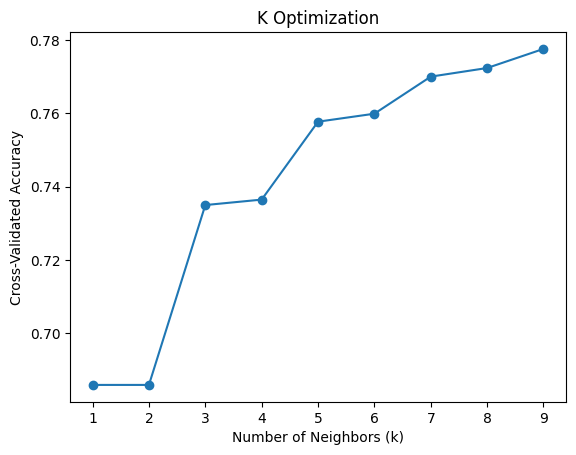

In [ ]:
# Hyperparameter Optimization
k_values = range(1, 10)
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())

best_k = k_values[np.argmax(mean_scores)]
print(f"Best k: {best_k} with mean accuracy: {max(mean_scores):.4f}")
# Results: K=9

# Plotting Results
import matplotlib.pyplot as plt
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K Optimization')
plt.show()

In [ ]:
# K-NN Model with distance-based weighting
knn = KNeighborsClassifier(n_neighbors=9, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25953  1083]
 [ 6668   620]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     27036
           1       0.36      0.09      0.14      7288

    accuracy                           0.77     34324
   macro avg       0.58      0.52      0.50     34324
weighted avg       0.70      0.77      0.71     34324



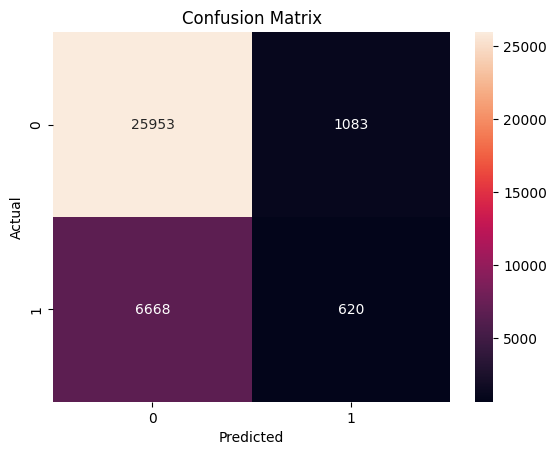

In [ ]:
# Confusion matirx figure
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

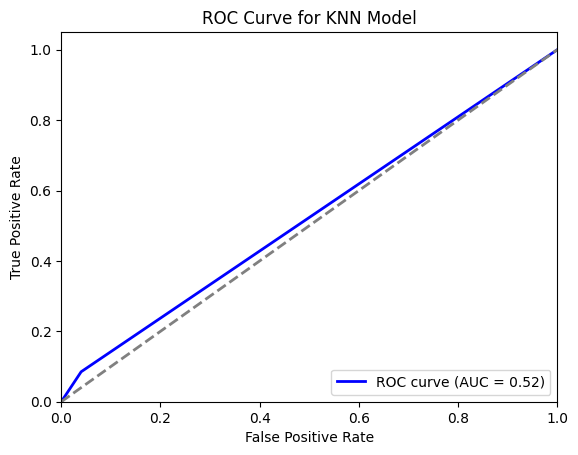

AUC Score: 0.52


In [ ]:
#ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model')
plt.legend(loc="lower right")
plt.show()
print(f"AUC Score: {roc_auc:.2f}")

##**Model 3b:** All Patients (Hamming Distance)

In [ ]:
# Split the data into features and target variable
X = selectedALL.drop('Has_Any_Psych_Condition', axis=1)
y = selectedALL['Has_Any_Psych_Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Best k: 9 with mean accuracy: 0.7812


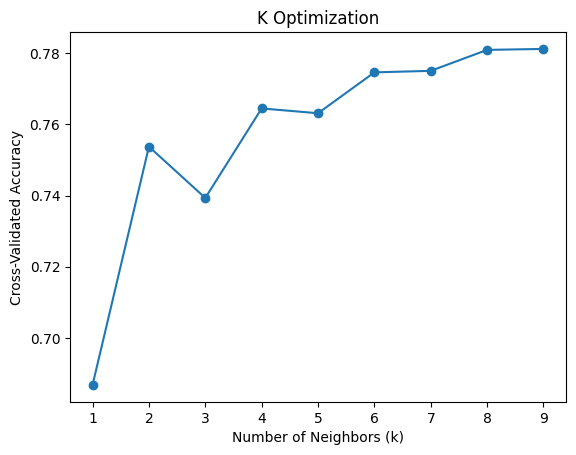

In [ ]:
# Hyperparameter Optimization
k_values = range(1, 10)
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='hamming')
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())

best_k = k_values[np.argmax(mean_scores)]
print(f"Best k: {best_k} with mean accuracy: {max(mean_scores):.4f}")
# Results: K=8

# Plotting Results
import matplotlib.pyplot as plt
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K Optimization')
plt.show()

In [ ]:
# K-NN Model with distance-based weighting
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='hamming')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[26280   756]
 [ 6888   400]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     27036
           1       0.35      0.05      0.09      7288

    accuracy                           0.78     34324
   macro avg       0.57      0.51      0.48     34324
weighted avg       0.70      0.78      0.71     34324



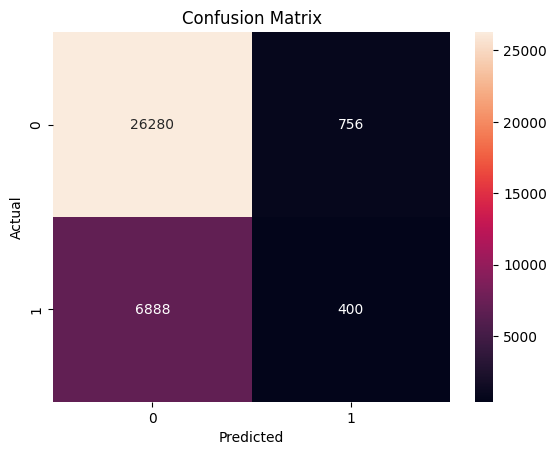

In [ ]:
#Confusion matrix figure
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

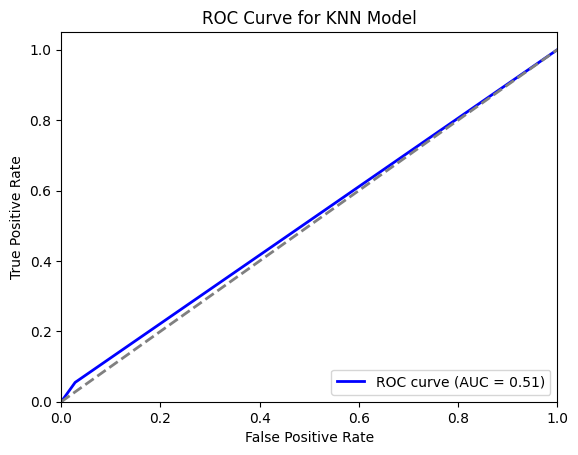

AUC Score: 0.51


In [ ]:
#ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model')
plt.legend(loc="lower right")
plt.show()
print(f"AUC Score: {roc_auc:.2f}")

#**Logistic Regression Model**


##**Model 1:** Diabetes

In [ ]:
# Split the data into features and target variable
X = selectedD.drop('Has_Any_Psych_Condition', axis=1)
y = selectedD['Has_Any_Psych_Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # transform the test set

# Apply undersampling to the training data
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Normalizing data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)  # Fit and transform on the resampled training set
X_test = scaler.transform(X_test)  # transform the test set

# Training logistic regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

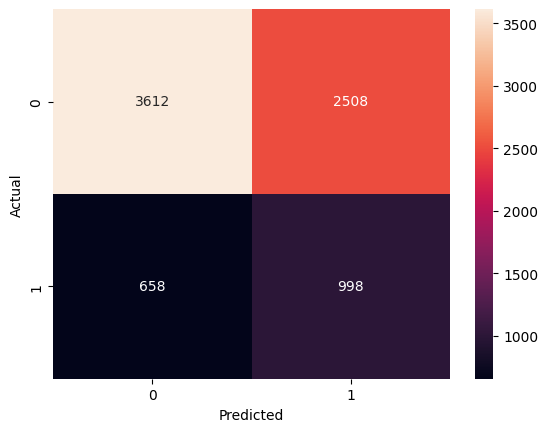

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Define models with different regularization and hyperparameters
models = {
    'Baseline': LogisticRegression(),
    'L1': LogisticRegression(penalty='l1', solver='liblinear'),
    'L2': LogisticRegression(penalty='l2', solver='liblinear'),
    'ElasticNet': LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5),
    'Tuned': GridSearchCV(
        LogisticRegression(),
        param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']},
        cv=5,
        scoring='f1'  # Choose an appropriate scoring metric
    )
}

# Evaluate each model
results = []
for name, model in models.items():
    # Fit the model
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Store results
    results.append([name, accuracy, precision, recall, f1, roc_auc])

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])

# Print the results
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

        Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0    Baseline  0.565660   0.262810  0.604472  0.366343  0.579978
1          L1  0.565660   0.262787  0.604362  0.366301  0.579938
2          L2  0.565637   0.262797  0.604472  0.366331  0.579964
3  ElasticNet  0.565683   0.262868  0.604692  0.366440  0.580074
4       Tuned  0.557012   0.261481  0.620883  0.367986  0.580575


##**Model 2:** No Diabetes

In [ ]:
# Split the data into features and target variable
X = selectedND.drop('Has_Any_Psych_Condition', axis=1)
y = selectedND['Has_Any_Psych_Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # transform the test set

# Apply undersampling to the training data
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Normalizing data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)  # Fit and transform on the resampled training set
X_test = scaler.transform(X_test)  # transform the test set

# Training logistic regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[19237 15394]
 [ 3591  5488]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.56      0.67     34631
           1       0.26      0.60      0.37      9079

    accuracy                           0.57     43710
   macro avg       0.55      0.58      0.52     43710
weighted avg       0.72      0.57      0.61     43710



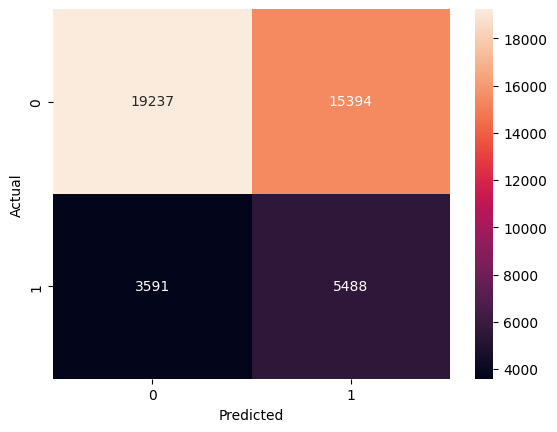

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Define models with different regularization and hyperparameters
models = {
    'Baseline': LogisticRegression(),
    'L1': LogisticRegression(penalty='l1', solver='liblinear'),
    'L2': LogisticRegression(penalty='l2', solver='liblinear'),
    'ElasticNet': LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5),
    'Tuned': GridSearchCV(
        LogisticRegression(),
        param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']},
        cv=5,
        scoring='f1'  # Choose an appropriate scoring metric
    )
}

# Evaluate each model
results = []
for name, model in models.items():
    # Fit the model
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Store results
    results.append([name, accuracy, precision, recall, f1, roc_auc])

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])

# Print the results
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

        Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0    Baseline  0.565660   0.262810  0.604472  0.366343  0.579978
1          L1  0.565660   0.262787  0.604362  0.366301  0.579938
2          L2  0.565637   0.262797  0.604472  0.366331  0.579964
3  ElasticNet  0.565683   0.262868  0.604692  0.366440  0.580074
4       Tuned  0.557012   0.261481  0.620883  0.367986  0.580575


##**Model 3:** All Patients

In [ ]:
# Split the data into features and target variable
X = selectedALL.drop('Has_Any_Psych_Condition', axis=1)
y = selectedALL['Has_Any_Psych_Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # transform the test set

# Apply undersampling to the training data
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Normalizing data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)  # Fit and transform on the resampled training set
X_test = scaler.transform(X_test)  # transform the test set

# Training logistic regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[19237 15394]
 [ 3591  5488]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.56      0.67     34631
           1       0.26      0.60      0.37      9079

    accuracy                           0.57     43710
   macro avg       0.55      0.58      0.52     43710
weighted avg       0.72      0.57      0.61     43710



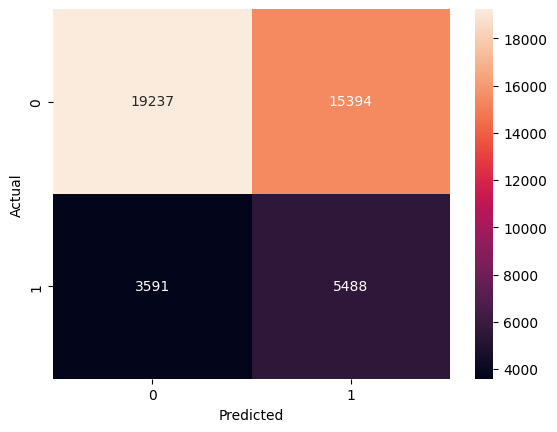

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Define models with different regularization and hyperparameters
models = {
    'Baseline': LogisticRegression(),
    'L1': LogisticRegression(penalty='l1', solver='liblinear'),
    'L2': LogisticRegression(penalty='l2', solver='liblinear'),
    'ElasticNet': LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5),
    'Tuned': GridSearchCV(
        LogisticRegression(),
        param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']},
        cv=5,
        scoring='f1'  # Choose an appropriate scoring metric
    )
}

# Evaluate each model
results = []
for name, model in models.items():
    # Fit the model
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Store results
    results.append([name, accuracy, precision, recall, f1, roc_auc])

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])

# Print the results
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

        Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0    Baseline  0.565660   0.262810  0.604472  0.366343  0.579978
1          L1  0.565683   0.262823  0.604472  0.366355  0.579993
2          L2  0.565637   0.262797  0.604472  0.366331  0.579964
3  ElasticNet  0.565683   0.262868  0.604692  0.366440  0.580074
4       Tuned  0.557035   0.261471  0.620773  0.367957  0.580549


#**Naive Bayes Model**


##**Model 1:** Diabetes

Training Data

In [ ]:
y = selectedD['Has_Any_Psych_Condition']
X_bin = selectedD[["Sex_Male", "b_R1_skin", "b_R1_foot", "b_R1_heart", "b_R1_eye", "b_R1_cancer", "b_R1_kidney", "b_R1_brain", "b_R1_death", "b_R1_gastric", "b_R1_pancreas", "b_R1_sleep"]]
X_cont = selectedD[["Age_at_Exam", "sBP", "LDL", "TG", "FBS"]]

X_cont_train, X_cont_test, X_bin_train, X_bin_test, y_train, y_test = train_test_split(X_cont, X_bin, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Gaussian Naive Bayes model for numerical columns
gnb = GaussianNB()
gnb = gnb.fit(X_cont_train, y_train)

# Train a Gaussian Naive Bayes model for numerical columns
bnb = BernoulliNB()
bnb = bnb.fit(X_bin_train, y_train)

# Get joint log probabilities for each model
gnb_log_pred = gnb.predict_joint_log_proba(X_cont_train)
bnb_log_pred = bnb.predict_joint_log_proba(X_bin_train)

# Combine the log probabilities, adjusting for the multiplication of P(Y) term
y_hat_prob = gnb_log_pred + bnb_log_pred

# Convert log probabilities back to probabilities
y_hat_prob = np.exp(y_hat_prob)
y_hat_prob = y_hat_prob / y_hat_prob.sum(1, keepdims=True)  # normalize to get valid probabilities

# Get the predicted class labels for *training set
y_hat = np.argmax(y_hat_prob, axis=1)

# Evaluate the combined model using custom functions, *training set
print(confusion_matrix(y_train, y_hat))
print(classification_report(y_train, y_hat))

[[16102   143]
 [ 4367   124]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     16245
           1       0.46      0.03      0.05      4491

    accuracy                           0.78     20736
   macro avg       0.63      0.51      0.46     20736
weighted avg       0.72      0.78      0.70     20736



<ipython-input-22-92bd625e1673>:18: RuntimeWarning: invalid value encountered in divide
  y_hat_prob = y_hat_prob / y_hat_prob.sum(1, keepdims=True)  # normalize to get valid probabilities


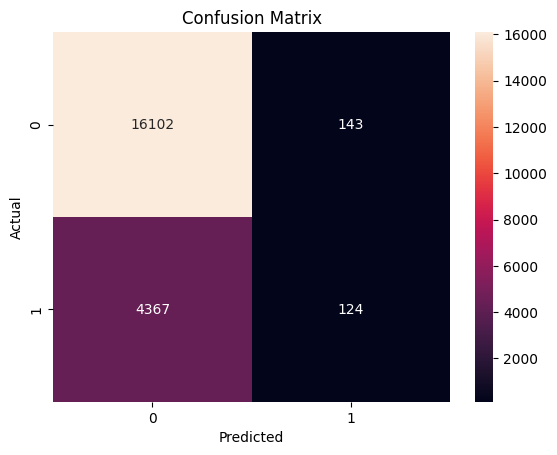

In [ ]:
# Confusion matirx figure
sns.heatmap(confusion_matrix(y_train, y_hat), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

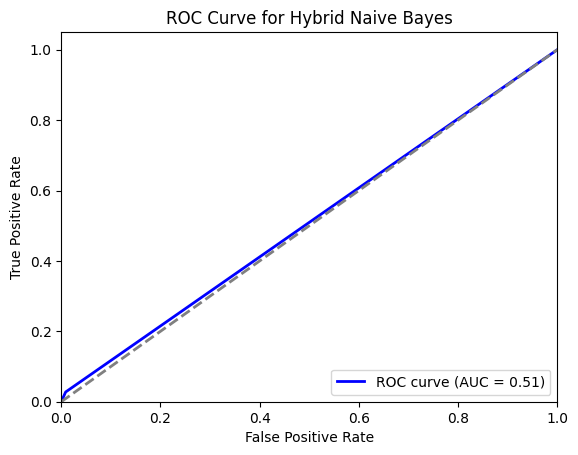

AUC Score: 0.51


In [ ]:
#ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_train, y_hat)
roc_auc = roc_auc_score(y_train, y_hat)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Hybrid Naive Bayes')
plt.legend(loc="lower right")
plt.show()
print(f"AUC Score: {roc_auc:.2f}")

Test Data

In [ ]:
# Get joint log probabilities for each model
gnb_log_pred = gnb.predict_joint_log_proba(X_cont_test)
bnb_log_pred = bnb.predict_joint_log_proba(X_bin_test)

# Combine the log probabilities, adjusting for the multiplication of P(Y) term
y_hat_prob = gnb_log_pred + bnb_log_pred

# Convert log probabilities back to probabilities
y_hat_prob = np.exp(y_hat_prob)
y_hat_prob = y_hat_prob / y_hat_prob.sum(1, keepdims=True)  # normalize to get valid probabilities

# Get the predicted class labels for *training set
y_hat = np.argmax(y_hat_prob, axis=1)

# Evaluate the combined model using custom functions, *training set
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))

[[4057   31]
 [1052   44]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      4088
           1       0.59      0.04      0.08      1096

    accuracy                           0.79      5184
   macro avg       0.69      0.52      0.48      5184
weighted avg       0.75      0.79      0.71      5184



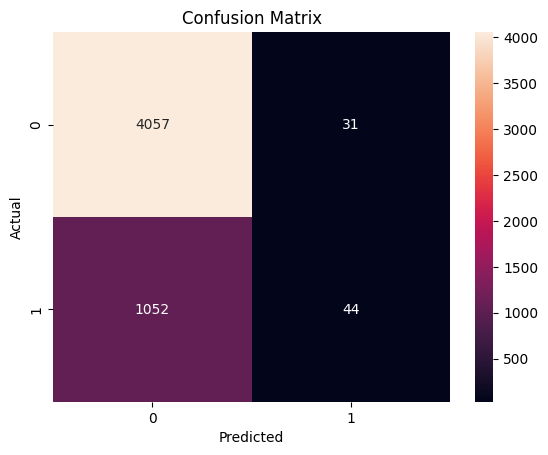

In [ ]:
# Confusion matirx figure
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

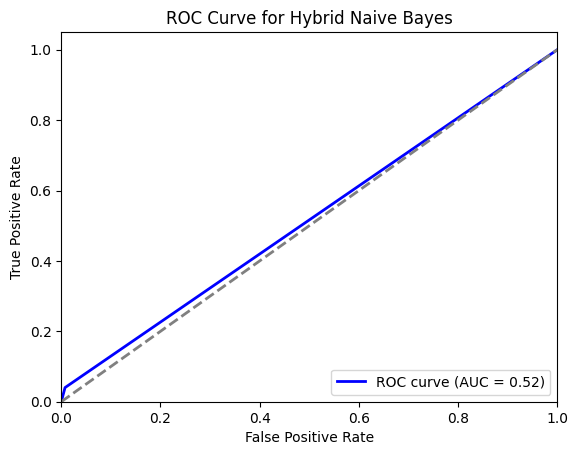

AUC Score: 0.52


In [ ]:
#ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_hat)
roc_auc = roc_auc_score(y_test, y_hat)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Hybrid Naive Bayes')
plt.legend(loc="lower right")
plt.show()
print(f"AUC Score: {roc_auc:.2f}")

##**Model 2:** No Diabetes

In [ ]:
Training Data

In [ ]:
y = selectedND['Has_Any_Psych_Condition']
X_bin = selectedND[["Sex_Male", "b_R1_skin", "b_R1_foot", "b_R1_heart", "b_R1_eye", "b_R1_cancer", "b_R1_kidney", "b_R1_brain", "b_R1_death", "b_R1_gastric", "b_R1_pancreas", "b_R1_sleep"]]
X_cont = selectedND[["Age_at_Exam", "sBP", "LDL", "TG", "FBS"]]

X_cont_train, X_cont_test, X_bin_train, X_bin_test, y_train, y_test = train_test_split(X_cont, X_bin, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Gaussian Naive Bayes model for numerical columns
gnb = GaussianNB()
gnb = gnb.fit(X_cont_train, y_train)

# Train a Gaussian Naive Bayes model for numerical columns
bnb = BernoulliNB()
bnb = bnb.fit(X_bin_train, y_train)

# Get joint log probabilities for each model
gnb_log_pred = gnb.predict_joint_log_proba(X_cont_train)
bnb_log_pred = bnb.predict_joint_log_proba(X_bin_train)


# Combine the log probabilities, adjusting for the multiplication of P(Y) term
y_hat_prob = gnb_log_pred + bnb_log_pred

# Convert log probabilities back to probabilities
y_hat_prob = np.exp(y_hat_prob)
y_hat_prob = y_hat_prob / y_hat_prob.sum(1, keepdims=True)  # normalize to get valid probabilities

# Get the predicted class labels for *training set
y_hat = np.argmax(y_hat_prob, axis=1)

# Evaluate the combined model using custom functions, *training set
print(confusion_matrix(y_train, y_hat))
print(classification_report(y_train, y_hat))

[[91503   776]
 [23424   856]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88     92279
           1       0.52      0.04      0.07     24280

    accuracy                           0.79    116559
   macro avg       0.66      0.51      0.47    116559
weighted avg       0.74      0.79      0.71    116559



<ipython-input-29-2d849a9d4460>:19: RuntimeWarning: invalid value encountered in divide
  y_hat_prob = y_hat_prob / y_hat_prob.sum(1, keepdims=True)  # normalize to get valid probabilities


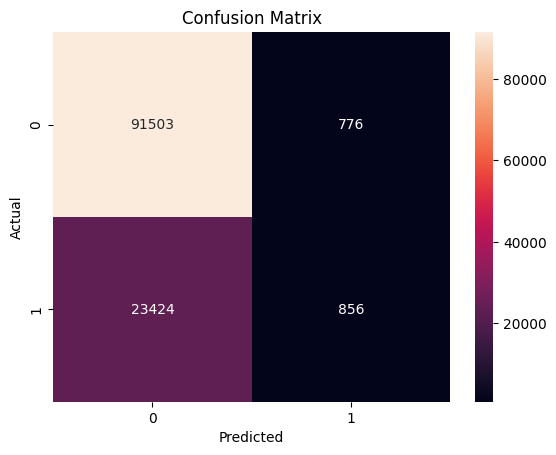

In [ ]:
# Confusion matirx figure
sns.heatmap(confusion_matrix(y_train, y_hat), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

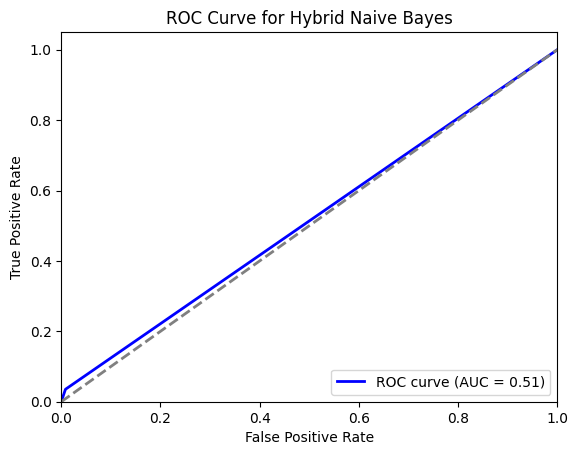

AUC Score: 0.51


In [ ]:
#ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_train, y_hat)
roc_auc = roc_auc_score(y_train, y_hat)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Hybrid Naive Bayes')
plt.legend(loc="lower right")
plt.show()
print(f"AUC Score: {roc_auc:.2f}")

Test Data

In [ ]:
# Get joint log probabilities for each model
gnb_log_pred = gnb.predict_joint_log_proba(X_cont_test)
bnb_log_pred = bnb.predict_joint_log_proba(X_bin_test)

# Combine the log probabilities, adjusting for the multiplication of P(Y) term
y_hat_prob = gnb_log_pred + bnb_log_pred

# Convert log probabilities back to probabilities
y_hat_prob = np.exp(y_hat_prob)
y_hat_prob = y_hat_prob / y_hat_prob.sum(1, keepdims=True)  # normalize to get valid probabilities

# Get the predicted class labels for *training set
y_hat = np.argmax(y_hat_prob, axis=1)

# Evaluate the combined model using custom functions, *training set
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))

[[22899   202]
 [ 5839   200]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88     23101
           1       0.50      0.03      0.06      6039

    accuracy                           0.79     29140
   macro avg       0.65      0.51      0.47     29140
weighted avg       0.73      0.79      0.71     29140



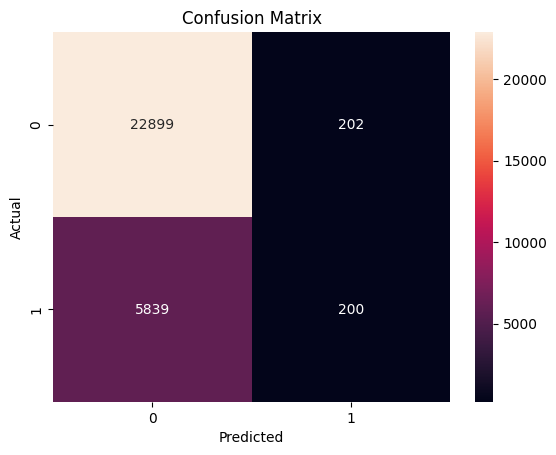

In [ ]:
# Confusion matirx figure
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

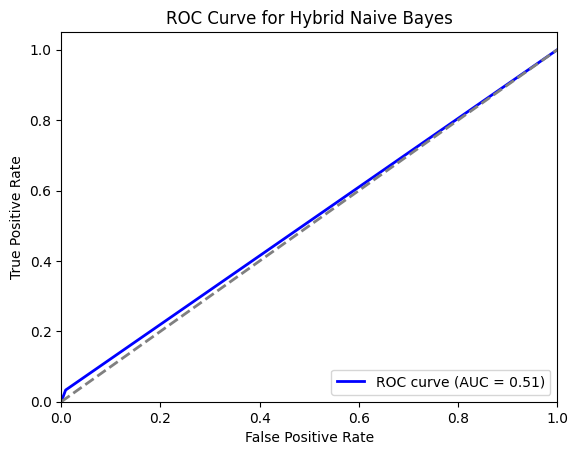

AUC Score: 0.51


In [ ]:
#ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_hat)
roc_auc = roc_auc_score(y_test, y_hat)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Hybrid Naive Bayes')
plt.legend(loc="lower right")
plt.show()
print(f"AUC Score: {roc_auc:.2f}")

##**Model 3:** All Patients


Training Data

In [ ]:
y = selectedALL['Has_Any_Psych_Condition']
X_bin = selectedALL[["Sex_Male", "b_R1_skin", "b_R1_foot", "b_R1_heart", "b_R1_eye", "b_R1_cancer", "b_R1_kidney", "b_R1_brain", "b_R1_death", "b_R1_gastric", "b_R1_pancreas", "b_R1_sleep"]]
X_cont = selectedALL[["Age_at_Exam", "sBP", "LDL", "TG", "FBS"]]

X_cont_train, X_cont_test, X_bin_train, X_bin_test, y_train, y_test = train_test_split(X_cont, X_bin, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Gaussian Naive Bayes model for numerical columns
gnb = GaussianNB()
gnb = gnb.fit(X_cont_train, y_train)

# Train a Gaussian Naive Bayes model for numerical columns
bnb = BernoulliNB()
bnb = bnb.fit(X_bin_train, y_train)

# Get joint log probabilities for each model
gnb_log_pred = gnb.predict_joint_log_proba(X_cont_train)
bnb_log_pred = bnb.predict_joint_log_proba(X_bin_train)


# Combine the log probabilities, adjusting for the multiplication of P(Y) term
y_hat_prob = gnb_log_pred + bnb_log_pred

# Convert log probabilities back to probabilities
y_hat_prob = np.exp(y_hat_prob)
y_hat_prob = y_hat_prob / y_hat_prob.sum(1, keepdims=True)  # normalize to get valid probabilities

# Get the predicted class labels for *training set
y_hat = np.argmax(y_hat_prob, axis=1)

# Evaluate the combined model using custom functions, *training set
print(confusion_matrix(y_train, y_hat))
print(classification_report(y_train, y_hat))

[[107793    884]
 [ 27674    944]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88    108677
           1       0.52      0.03      0.06     28618

    accuracy                           0.79    137295
   macro avg       0.66      0.51      0.47    137295
weighted avg       0.74      0.79      0.71    137295



<ipython-input-36-2d849a9d4460>:19: RuntimeWarning: invalid value encountered in divide
  y_hat_prob = y_hat_prob / y_hat_prob.sum(1, keepdims=True)  # normalize to get valid probabilities


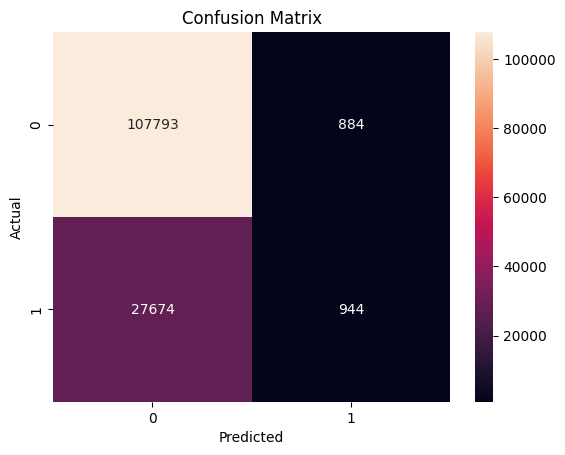

In [ ]:
# Confusion matirx figure
sns.heatmap(confusion_matrix(y_train, y_hat), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

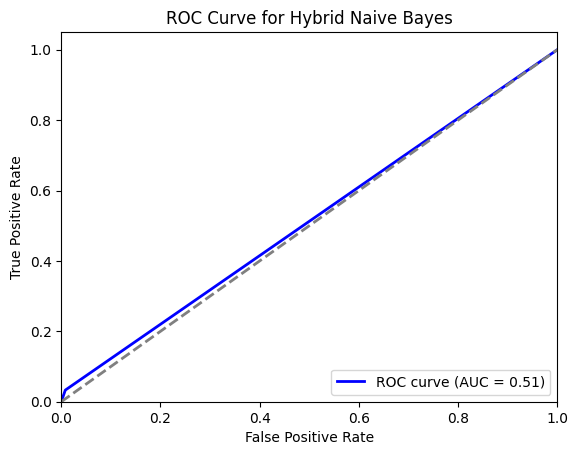

AUC Score: 0.51


In [ ]:
#ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_train, y_hat)
roc_auc = roc_auc_score(y_train, y_hat)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Hybrid Naive Bayes')
plt.legend(loc="lower right")
plt.show()
print(f"AUC Score: {roc_auc:.2f}")

Test Data

In [ ]:
# Get joint log probabilities for each model
gnb_log_pred = gnb.predict_joint_log_proba(X_cont_test)
bnb_log_pred = bnb.predict_joint_log_proba(X_bin_test)

# Combine the log probabilities, adjusting for the multiplication of P(Y) term
y_hat_prob = gnb_log_pred + bnb_log_pred

# Convert log probabilities back to probabilities
y_hat_prob = np.exp(y_hat_prob)
y_hat_prob = y_hat_prob / y_hat_prob.sum(1, keepdims=True)  # normalize to get valid probabilities

# Get the predicted class labels for *training set
y_hat = np.argmax(y_hat_prob, axis=1)

# Evaluate the combined model using custom functions, *training set
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))

[[26816   220]
 [ 7050   238]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     27036
           1       0.52      0.03      0.06      7288

    accuracy                           0.79     34324
   macro avg       0.66      0.51      0.47     34324
weighted avg       0.73      0.79      0.71     34324



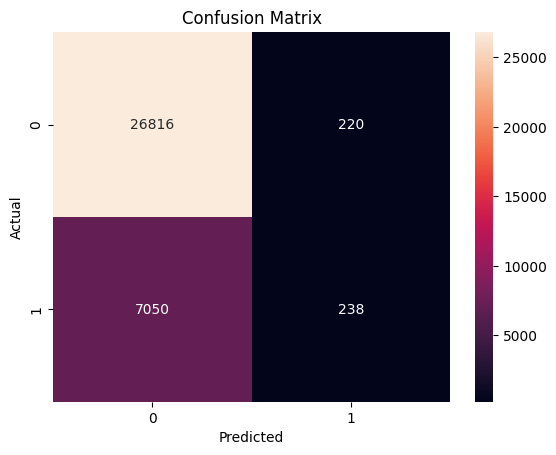

In [ ]:
# Confusion matirx figure
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

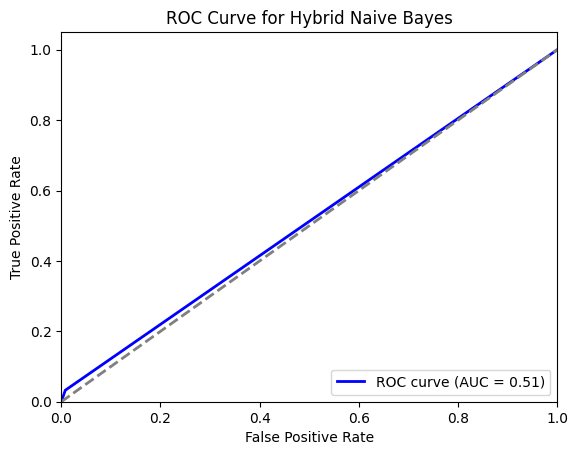

AUC Score: 0.51


In [ ]:
#ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_hat)
roc_auc = roc_auc_score(y_test, y_hat)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Hybrid Naive Bayes')
plt.legend(loc="lower right")
plt.show()
print(f"AUC Score: {roc_auc:.2f}")

#**Random Forest**


##**Model 1:** Diabetes

In [ ]:
# Split the data into features and target variable
X = selectedD.drop('Has_Any_Psych_Condition', axis=1)
y = selectedD['Has_Any_Psych_Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing data (Not always necessary for Random Forest, but keeping for consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # Transform the test set

# Define hyperparameter grid for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Randomized Search
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Updating the model's hyperparameters with the best parameters identified from Randomized Search
rf_model = random_search.best_estimator_

# Training Random Forest model
#rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Model evaluation
y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[5981  139]
 [1554  102]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      6120
           1       0.42      0.06      0.11      1656

    accuracy                           0.78      7776
   macro avg       0.61      0.52      0.49      7776
weighted avg       0.71      0.78      0.71      7776



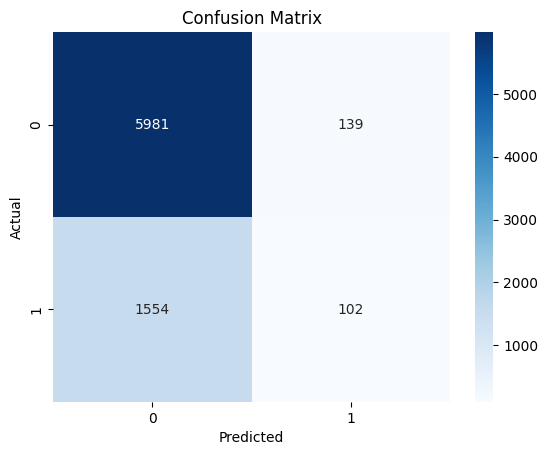

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


##**Model 2:** No Diabetes

In [ ]:
# Split the data into features and target variable
X = selectedND.drop('Has_Any_Psych_Condition', axis=1)
y = selectedND['Has_Any_Psych_Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing data (Not always necessary for Random Forest, but keeping for consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # Transform the test set

# Define hyperparameter grid for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Randomized Search
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Updating the model's hyperparameters with the best parameters identified from Randomized Search
rf_model = random_search.best_estimator_

# Training Random Forest model
#rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Model evaluation
y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Confusion Matrix:
[[33782   849]
 [ 8532   547]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     34631
           1       0.39      0.06      0.10      9079

    accuracy                           0.79     43710
   macro avg       0.60      0.52      0.49     43710
weighted avg       0.71      0.79      0.72     43710



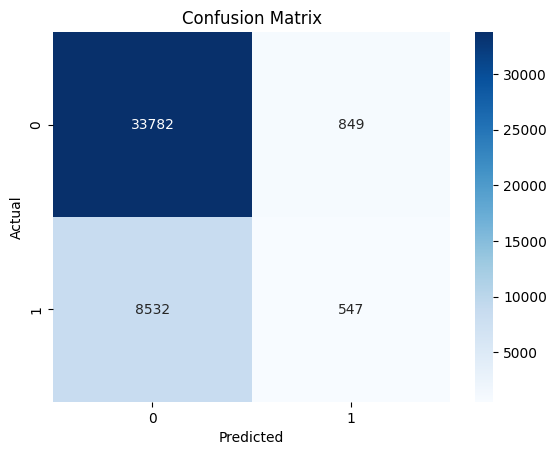

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


##**Model 3:** All Patients

In [ ]:
# Split the data into features and target variable
X = selectedALL.drop('Has_Any_Psych_Condition', axis=1)
y = selectedALL['Has_Any_Psych_Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing data (Not always necessary for Random Forest, but keeping for consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # Transform the test set

# Define hyperparameter grid for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Randomized Search
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Updating the model's hyperparameters with the best parameters identified from Randomized Search
rf_model = random_search.best_estimator_

# Training Random Forest model
#rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Model evaluation
y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Confusion Matrix:
[[22496   605]
 [ 5643   396]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     23101
           1       0.40      0.07      0.11      6039

    accuracy                           0.79     29140
   macro avg       0.60      0.52      0.50     29140
weighted avg       0.72      0.79      0.72     29140



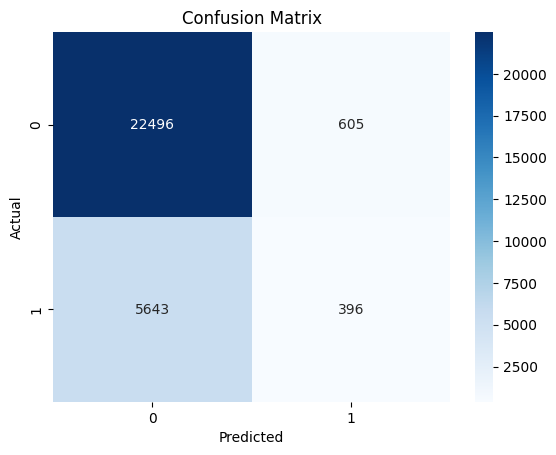

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


#**XGBoost**


##**Model 1:** Diabetes

In [ ]:
# Split the data into features (X) and target variable (y)
X = selectedD.drop('Has_Any_Psych_Condition', axis=1)
y = selectedD['Has_Any_Psych_Condition']

# Splitting the data into 70% training and 30% testing, ensuring class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

# Undersampling the majority class
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Initializing the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=10, use_label_encoder=False, eval_metric="logloss")

# Training the model on the resampled training dataset
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predicting on the training and test dataset
train_preds = xgb_model.predict(X_train_resampled)
test_preds = xgb_model.predict(X_test)

# Displaying accuracy scores
print(f"Training Accuracy: {accuracy_score(y_train_resampled, train_preds):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, test_preds):.4f}")

# Defining hyperparameters for GridSearchCV
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [1, 5],
    "learning_rate": [0.1, 0.2],
    "min_child_weight": [25]  # Corrected hyperparameter name
}

# Using StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

# Setting up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=skf,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fitting GridSearchCV on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Displaying the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Training the final model with the best parameters
best_xgb_model = xgb.XGBClassifier(**grid_search.best_params_, random_state=10, use_label_encoder=False, eval_metric="logloss")
best_xgb_model.fit(X_train_resampled, y_train_resampled)

# Predicting on the test dataset
final_preds = best_xgb_model.predict(X_test)

# Model evaluation
conf_matrix = confusion_matrix(y_test, final_preds)
class_report = classification_report(y_test, final_preds)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:22:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.8529
Testing Accuracy: 0.5797
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:22:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 1, 'min_child_weight': 25, 'n_estimators': 200}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:22:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Confusion Matrix:
[[3782 2318]
 [ 662 1014]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.62      0.72      6100
           1       0.30      0.61      0.40      1676

    accuracy                           0.62      7776
   macro avg       0.58      0.61      0.56      7776
weighted avg       0.73      0.62      0.65      7776



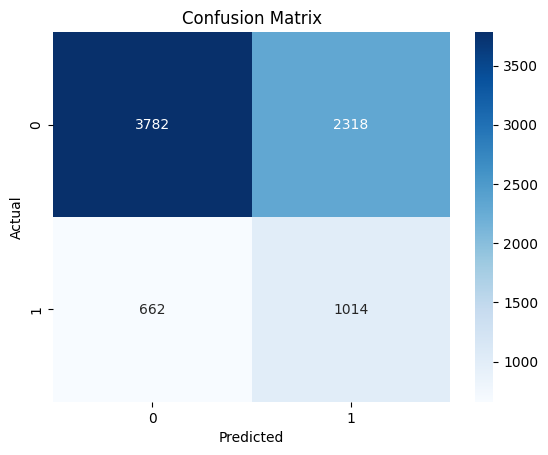

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
final_preds = best_xgb_model.predict(X_train)
conf_matrix = confusion_matrix(y_train, final_preds)
class_report = classification_report(y_train, final_preds)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[8870 5363]
 [1589 2322]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.62      0.72     14233
           1       0.30      0.59      0.40      3911

    accuracy                           0.62     18144
   macro avg       0.58      0.61      0.56     18144
weighted avg       0.73      0.62      0.65     18144



##**Model 2:** No Diabetes

In [ ]:
# Split the data into features (X) and target variable (y)
X = selectedND.drop('Has_Any_Psych_Condition', axis=1)
y = selectedND['Has_Any_Psych_Condition']

# Splitting the data into 70% training and 30% testing, ensuring class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

# Undersampling the majority class
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Initializing the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=10, use_label_encoder=False, eval_metric="logloss")

# Training the model on the resampled training dataset
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predicting on the training and test dataset
train_preds = xgb_model.predict(X_train_resampled)
test_preds = xgb_model.predict(X_test)

# Displaying accuracy scores
print(f"Training Accuracy: {accuracy_score(y_train_resampled, train_preds):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, test_preds):.4f}")

# Defining hyperparameters for GridSearchCV
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [1, 5],
    "learning_rate": [0.1, 0.2],
    "min_child_weight": [25]  # Corrected hyperparameter name
}

# Using StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

# Setting up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=skf,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fitting GridSearchCV on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Displaying the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Training the final model with the best parameters
best_xgb_model = xgb.XGBClassifier(**grid_search.best_params_, random_state=10, use_label_encoder=False, eval_metric="logloss")
best_xgb_model.fit(X_train_resampled, y_train_resampled)

# Predicting on the test dataset
final_preds = best_xgb_model.predict(X_test)

# Model evaluation
conf_matrix = confusion_matrix(y_test, final_preds)
class_report = classification_report(y_test, final_preds)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:53:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.6907
Testing Accuracy: 0.5893
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:53:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 25, 'n_estimators': 100}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:53:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Confusion Matrix:
[[17250 17364]
 [ 3067  6029]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.50      0.63     34614
           1       0.26      0.66      0.37      9096

    accuracy                           0.53     43710
   macro avg       0.55      0.58      0.50     43710
weighted avg       0.73      0.53      0.57     43710



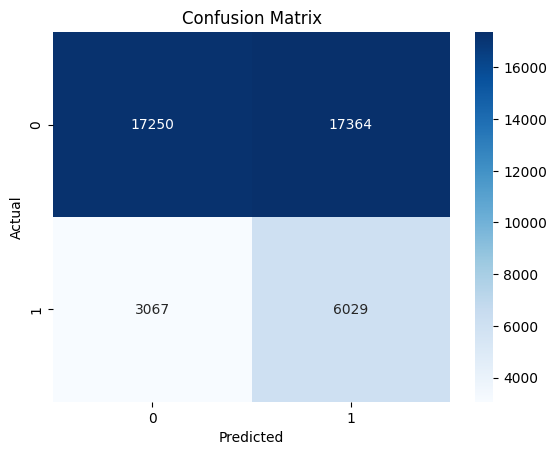

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

##**Model 3:** All Patients

In [ ]:
# Split the data into features (X) and target variable (y)
X = selectedALL.drop('Has_Any_Psych_Condition', axis=1)
y = selectedALL['Has_Any_Psych_Condition']

# Splitting the data into 70% training and 30% testing, ensuring class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

# Undersampling the majority class
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Initializing the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=10, use_label_encoder=False, eval_metric="logloss")

# Training the model on the resampled training dataset
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predicting on the training and test dataset
train_preds = xgb_model.predict(X_train_resampled)
test_preds = xgb_model.predict(X_test)

# Displaying accuracy scores
print(f"Training Accuracy: {accuracy_score(y_train_resampled, train_preds):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, test_preds):.4f}")

# Defining hyperparameters for GridSearchCV
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [1, 5],
    "learning_rate": [0.1, 0.2],
    "min_child_weight": [25]  # Corrected hyperparameter name
}

# Using StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

# Setting up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=skf,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fitting GridSearchCV on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Displaying the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Training the final model with the best parameters
best_xgb_model = xgb.XGBClassifier(**grid_search.best_params_, random_state=10, use_label_encoder=False, eval_metric="logloss")
best_xgb_model.fit(X_train_resampled, y_train_resampled)

# Predicting on the test dataset
final_preds = best_xgb_model.predict(X_test)

# Model evaluation
conf_matrix = confusion_matrix(y_test, final_preds)
class_report = classification_report(y_test, final_preds)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.6907
Testing Accuracy: 0.5893
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 25, 'n_estimators': 100}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Confusion Matrix:
[[17250 17364]
 [ 3067  6029]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.50      0.63     34614
           1       0.26      0.66      0.37      9096

    accuracy                           0.53     43710
   macro avg       0.55      0.58      0.50     43710
weighted avg       0.73      0.53      0.57     43710



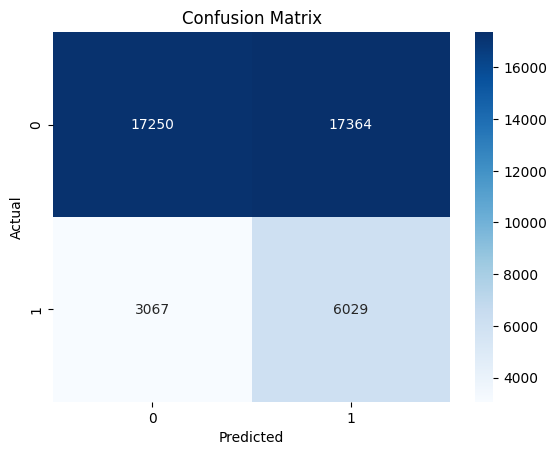

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#**Support Vector Machines (SVM)**

##**Model 1:** Diabetes

In [ ]:
# Split the data into features and target variable
XD = selectedD.drop('Has_Any_Psych_Condition', axis=1)
XND = selectedND.drop('Has_Any_Psych_Condition', axis=1)
XALL = selectedALL.drop('Has_Any_Psych_Condition', axis=1)
yD = selectedD['Has_Any_Psych_Condition']
yND = selectedND['Has_Any_Psych_Condition']
yALL = selectedALL['Has_Any_Psych_Condition']


# Split the dataset into training and testing sets
XD_train, XD_test, yD_train, yD_test = train_test_split(XD, yD, test_size=0.2, random_state=42)
XND_train, XND_test, yND_train, yND_test = train_test_split(XND, yND, test_size=0.2, random_state=42)
XALL_train, XALL_test, yALL_train, yALL_test = train_test_split(XALL, yALL, test_size=0.2, random_state=42)

In [ ]:
# Initialize an SVM classifier with class weight balancing.
svm = SVC(class_weight='balanced')

# Define a dictionary of hyperparameter values to search over.
param_dist = {
    'class_weight' : [None, 'balanced'],  # Options for class weight balancing
    'C':[0.01, 0.1, 1, 10],  # Regularization parameter values to search
    'kernel' : ["rbf"],  # Kernel function (in this case, radial basis function)
    'gamma' : [0.01, 1, 10]  # Kernel coefficient values to search
}

# Create a StratifiedKFold cross-validation object with 3 folds.
skf = StratifiedKFold(n_splits=3)

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(
    svm,  # SVM classifier instance
    param_grid=param_dist,  # Hyperparameter grid to search
    cv=skf,  # Cross-validation strategy (StratifiedKFold)
    scoring='f1_weighted',  # F1-score weighted by class frequencies
)

# Execute grid search for hyperparameter tuning on the SVM model.
grid_search.fit(XD_train, yD_train)

# Create a DataFrame to store and analyze the results of the hyperparameter search.
results = pd.DataFrame(grid_search.cv_results_)

# Extract and display the best-performing hyperparameter set based on 'rank_test_score.'
best_results = results[results['rank_test_score'] == 1]

# Print the F1-micro score
print(f"F1-micro Score: {best_results['mean_test_score'].iloc[0]}")

# Print the hyperparameters
print(best_results.filter(like='param', axis=1).iloc[0])

F1-micro Score: 0.6917302690560275
param_C                                                            10.0
param_class_weight                                             balanced
param_gamma                                                         1.0
param_kernel                                                        rbf
params                {'C': 10, 'class_weight': 'balanced', 'gamma':...
Name: 22, dtype: object


In [ ]:
# Configure the SVM model with the best hyperparameters from the grid search.
model = svm.set_params(**grid_search.best_params_)

# Train the configured SVM model on the training data.
modelD = model.fit(XD_train, yD_train)

In [ ]:
# Configure the SVM model with the best hyperparameters from the grid search.
model = svm.set_params(**grid_search.best_params_)

# Train the configured SVM model on the training data.
modelND = model.fit(XND_train, yND_train)

In [ ]:
# Configure the SVM model with the best hyperparameters from the grid search.
model = svm.set_params(**grid_search.best_params_)

# Train the configured SVM model on the training data.
modelALL = model.fit(XALL_train, yALL_train)

In [ ]:
# Generate predictions for the training and test datasets using the trained SVM model.
yD_pred_train = modelD.predict(XD_train)
yD_pred_test = modelD.predict(XD_test)

# Display performance metrics for the training data.
print('----------- Train --------------')
print("Accuracy:", accuracy_score(yD_train, yD_pred_train))
print("\nClassification Report:\n", classification_report(yD_train, yD_pred_train))

# Display performance metrics for the test data.
print('----------- Test --------------')
print("Accuracy:", accuracy_score(yD_test, yD_pred_test))
print("\nClassification Report:\n", classification_report(yD_test, yD_pred_test))

----------- Train --------------
Accuracy: 0.9974922839506173

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16245
           1       0.99      1.00      0.99      4491

    accuracy                           1.00     20736
   macro avg       0.99      1.00      1.00     20736
weighted avg       1.00      1.00      1.00     20736

----------- Test --------------
Accuracy: 0.7604166666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86      4088
           1       0.26      0.07      0.12      1096

    accuracy                           0.76      5184
   macro avg       0.53      0.51      0.49      5184
weighted avg       0.68      0.76      0.70      5184



In [ ]:
# Generate predictions for the training and test datasets using the trained SVM model.
yND_pred_train = modelND.predict(XND_train)
yND_pred_test = modelND.predict(XND_test)

# Display performance metrics for the training data.
print('----------- Train --------------')
print("Accuracy:", accuracy_score(yND_train, yND_pred_train))
print("\nClassification Report:\n", classification_report(yND_train, yND_pred_train))

# Display performance metrics for the test data.
print('----------- Test --------------')
print("Accuracy:", accuracy_score(yND_test, yND_pred_test))
print("\nClassification Report:\n", classification_report(yND_test, yND_pred_test))

----------- Train --------------
Accuracy: 0.9217992604603678

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95     92279
           1       0.74      0.97      0.84     24280

    accuracy                           0.92    116559
   macro avg       0.86      0.94      0.89    116559
weighted avg       0.94      0.92      0.93    116559

----------- Test --------------
Accuracy: 0.66681537405628

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79     23101
           1       0.21      0.23      0.22      6039

    accuracy                           0.67     29140
   macro avg       0.50      0.50      0.50     29140
weighted avg       0.67      0.67      0.67     29140



In [ ]:
# Generate predictions for the training and test datasets using the trained SVM model.
yALL_pred_train = modelALL.predict(XALL_train)
yALL_pred_test = modelALL.predict(XALL_test)

# Display performance metrics for the training data.
print('----------- Train --------------')
print("Accuracy:", accuracy_score(yALL_train, yALL_pred_train))
print("\nClassification Report:\n", classification_report(yALL_train, yALL_pred_train))

# Display performance metrics for the test data.
print('----------- Test --------------')
print("Accuracy:", accuracy_score(yALL_test, yALL_pred_test))
print("\nClassification Report:\n", classification_report(yALL_test, yALL_pred_test))

----------- Train --------------
Accuracy: 0.9276667030845989

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95    108677
           1       0.75      0.97      0.85     28618

    accuracy                           0.93    137295
   macro avg       0.87      0.94      0.90    137295
weighted avg       0.94      0.93      0.93    137295

----------- Test --------------
Accuracy: 0.6712504370120033

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79     27036
           1       0.22      0.21      0.21      7288

    accuracy                           0.67     34324
   macro avg       0.50      0.50      0.50     34324
weighted avg       0.67      0.67      0.67     34324

